___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1835]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1836]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1837]:
import tensorflow as tf

In [1838]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [1839]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [1840]:
seed = 42
keras.utils.set_random_seed(seed)

In [1841]:
print(tf.__version__)

2.14.0


In [1842]:
df = pd.read_csv('1-Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [1843]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [1844]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [1845]:
#cheak the number of unique value
df.select_dtypes(include="object").nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [1846]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [1847]:
#Feature Elimination
df.drop(columns = 'RowNumber',inplace = True)
df.drop(columns = 'CustomerId',inplace = True)
df.drop(columns = 'Surname',inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [1848]:
#Store Catagorical Variable in one variable
Cat_var = ['Geography','Gender','Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']

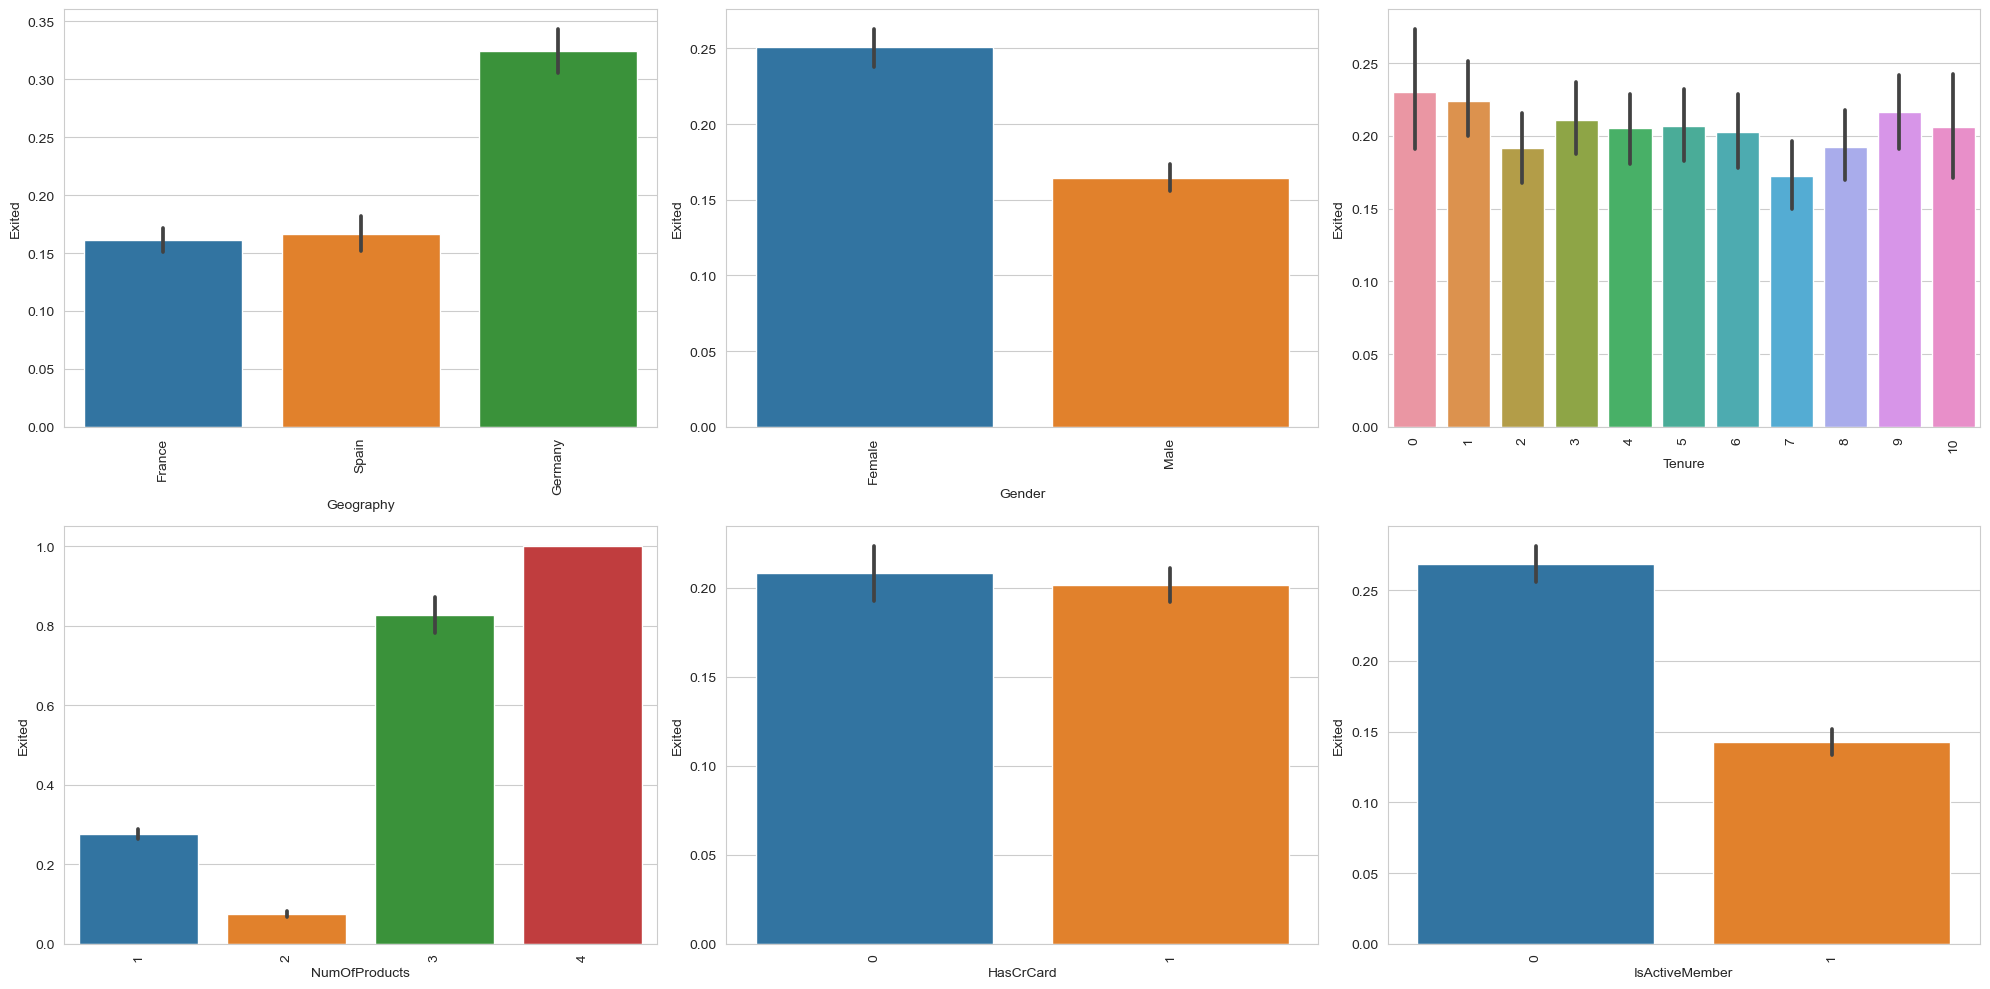

In [1849]:
#Creating Fig with subplot
fig, axs = plt.subplots(nrows= 2, ncols= 3,figsize= (20,10))
axs= axs.flatten()

#Creating barplot for each catagorical variable
for i,var in enumerate(Cat_var):
    sns.barplot(x=var,y='Exited',data=df ,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
    
    #adjust spacing between subplots
    fig.tight_layout()

#show plot
plt.show()

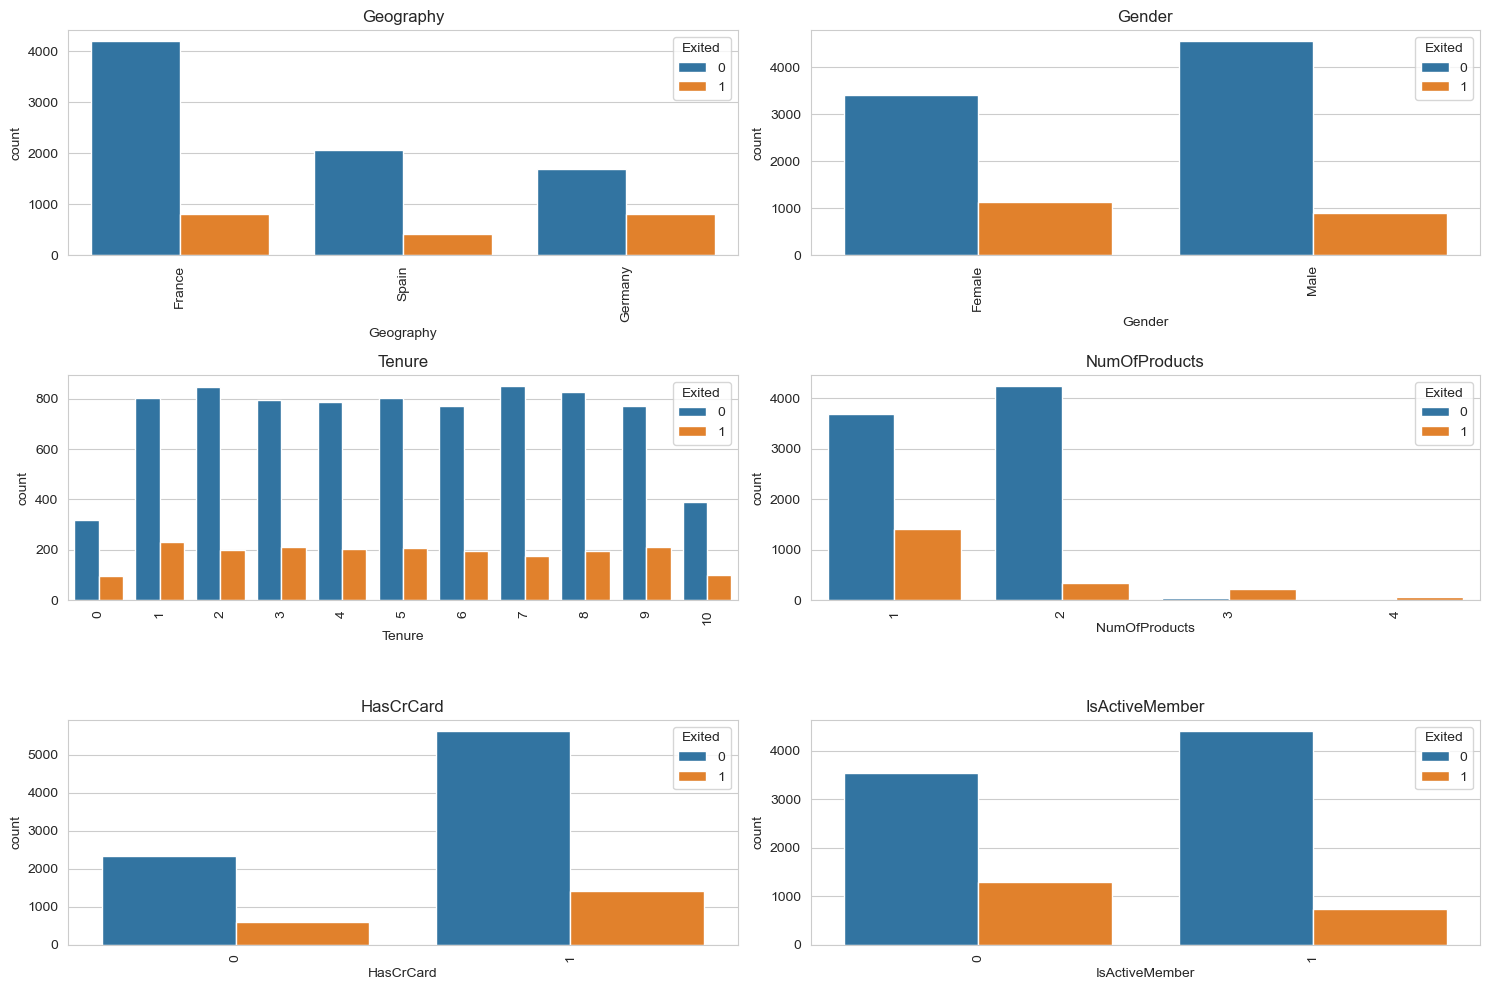

In [1850]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(Cat_var)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through categorical variables and create countplots
for i, var in enumerate(Cat_var):
    row = i // num_cols
    col = i % num_cols
    ax = axs[i]
    
    sns.countplot(data=df, x=var, hue='Exited', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(var)
    
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

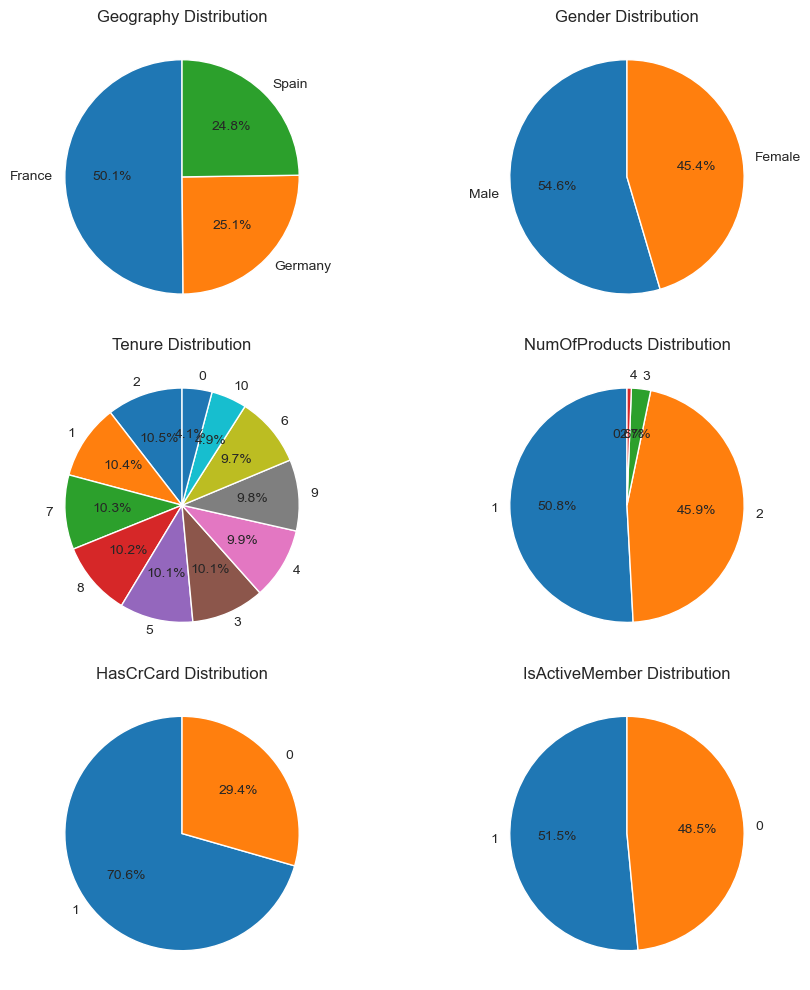

In [1851]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(Cat_var)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through categorical variables and create countplots
for i, var in enumerate(Cat_var):
    if i < len(axs):
        ax = axs[i]
        cat_counts = df[var].value_counts()
        ax.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{var} Distribution')
    
# Adjust spacing between subplots
fig.tight_layout()

# If there's an extra subplot that needs to be removed
if len(axs) > num_cat_vars:
    fig.delaxes(axs[-1])

# Show the plot
plt.show()

In [1852]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [1853]:
num_vars = ['CreditScore','Age','Balance','EstimatedSalary']

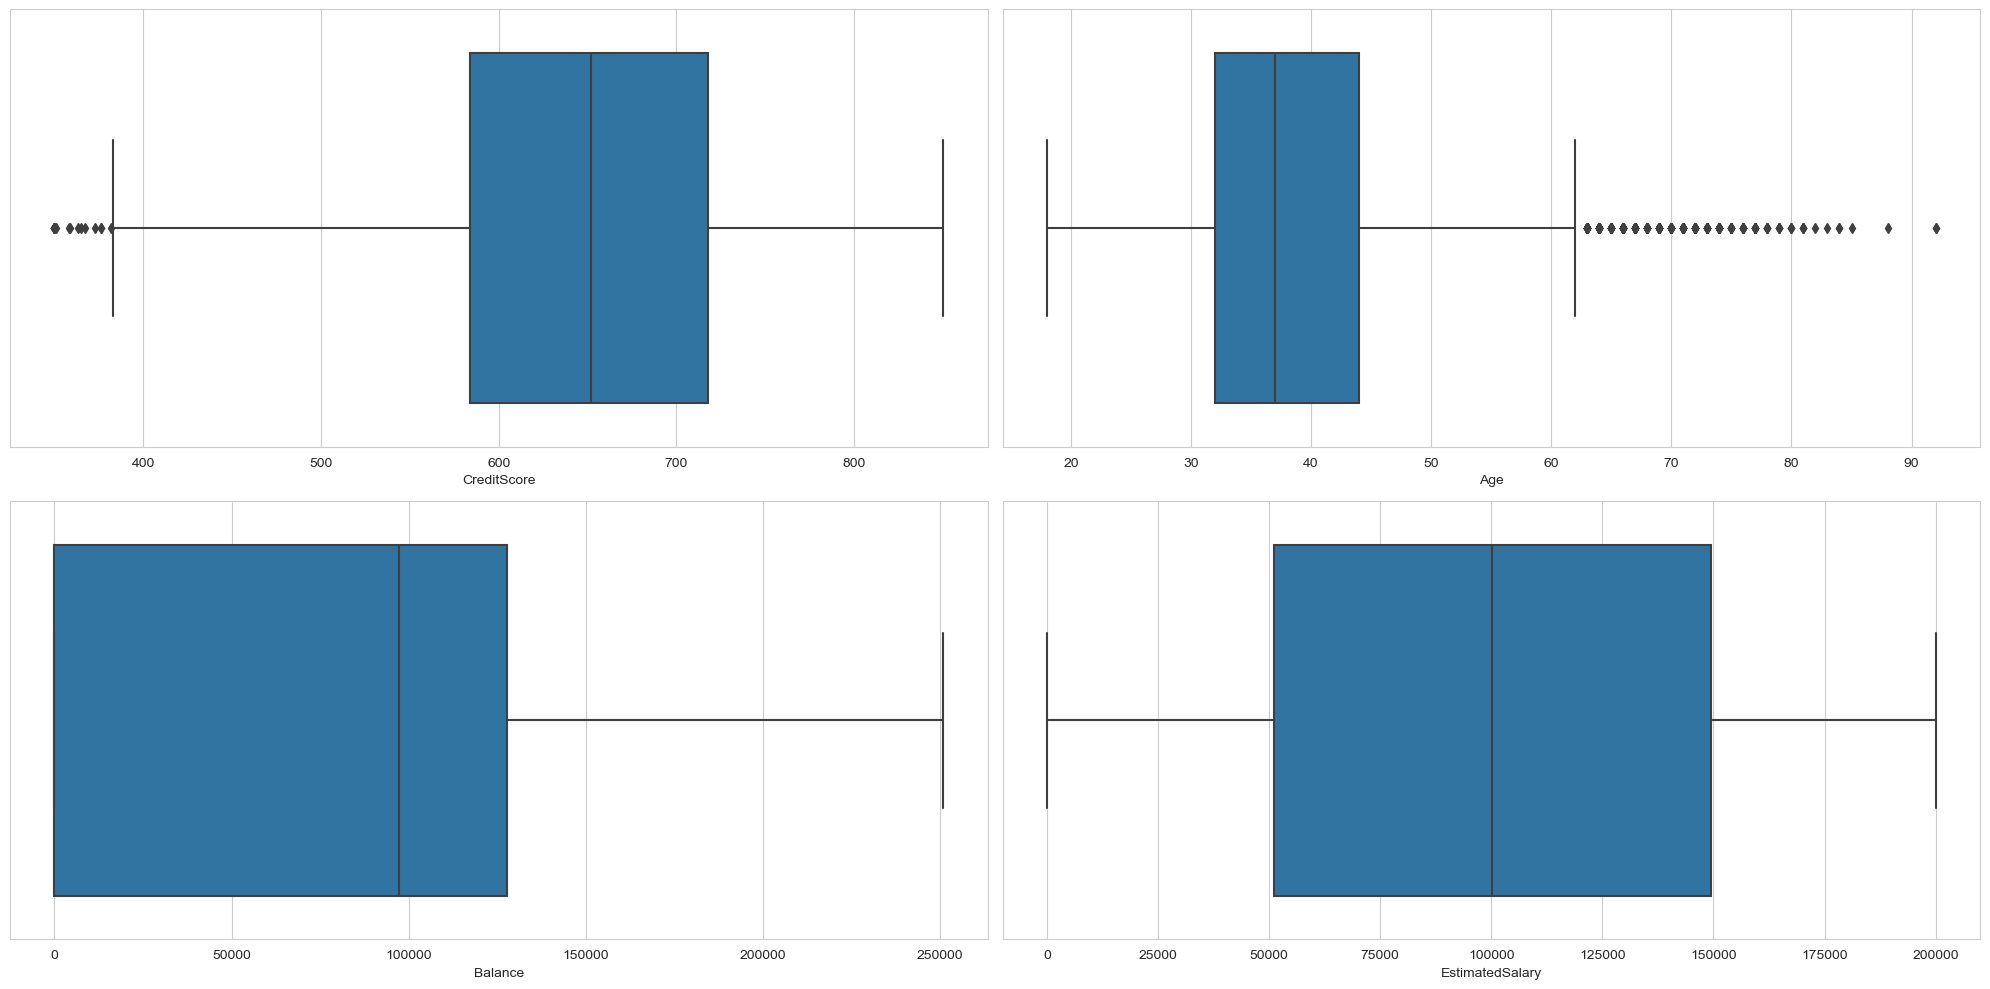

In [1854]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(num_vars)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var,data=df, ax=axs[i])
    
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

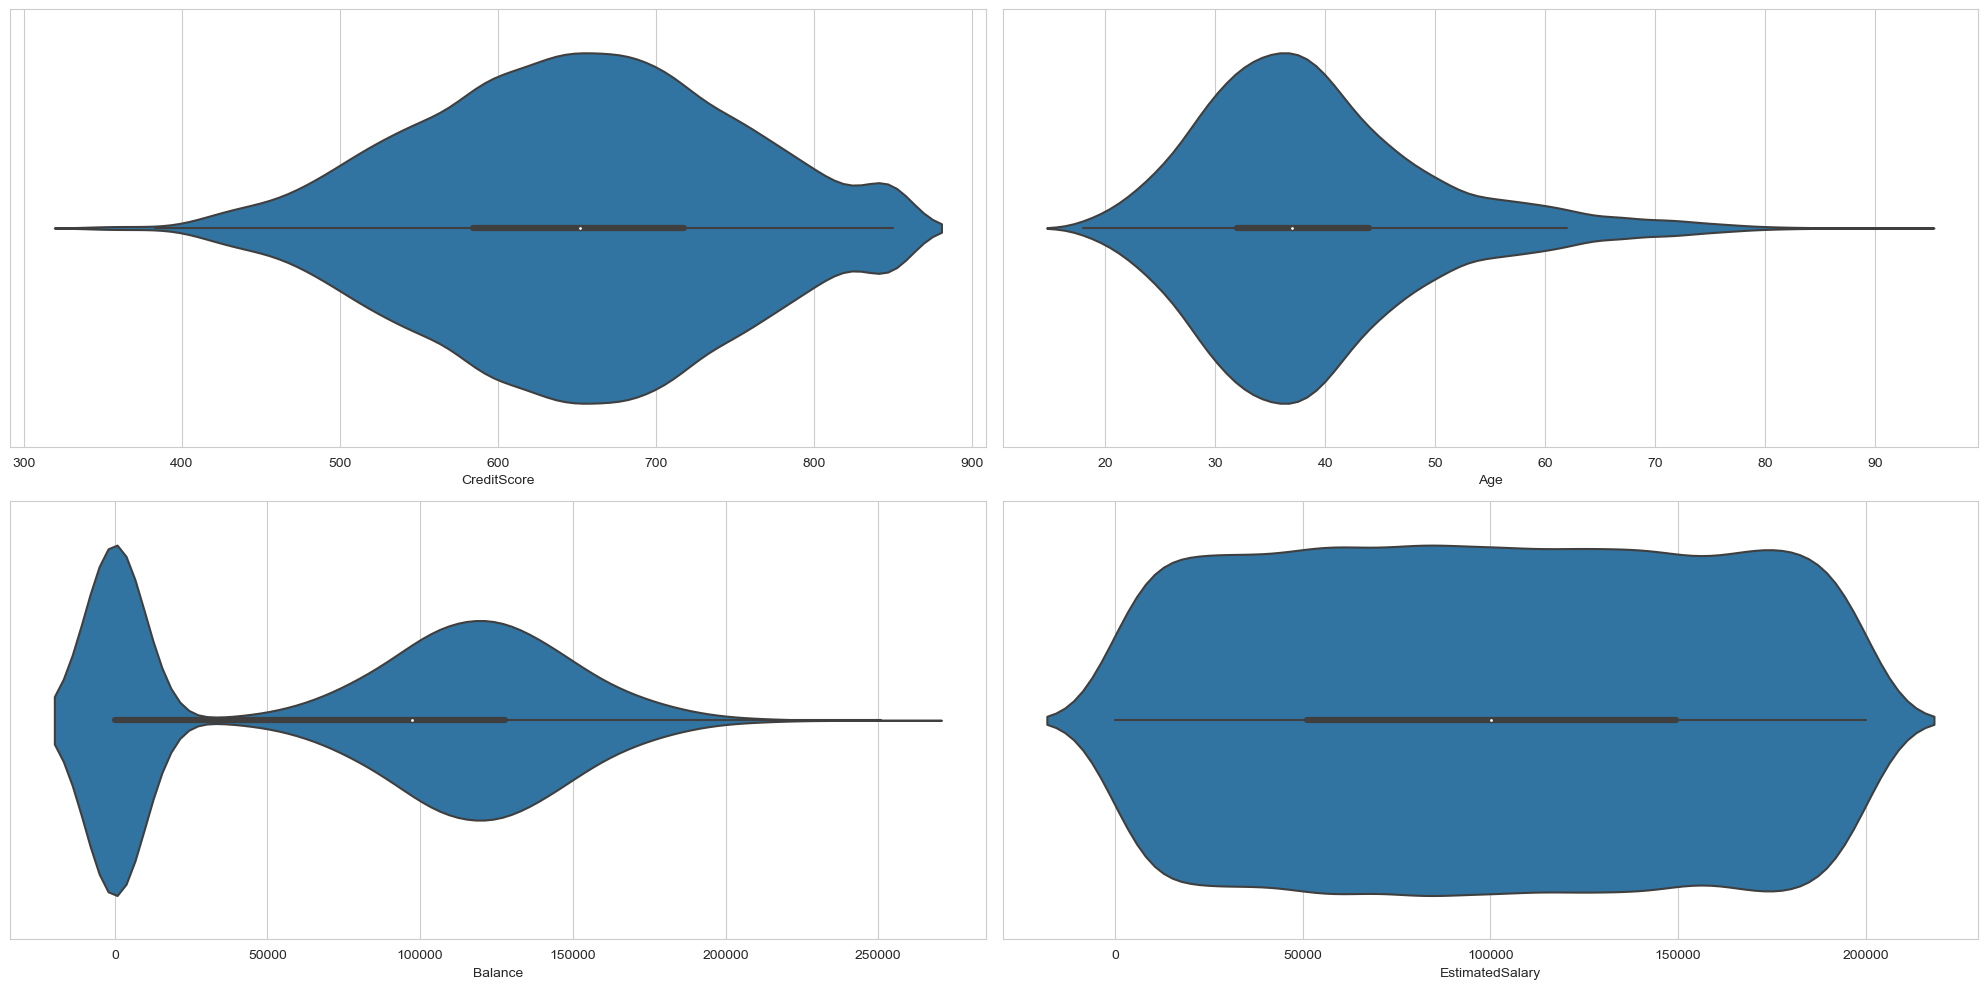

In [1855]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(num_vars)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var,data=df, ax=axs[i])
    
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

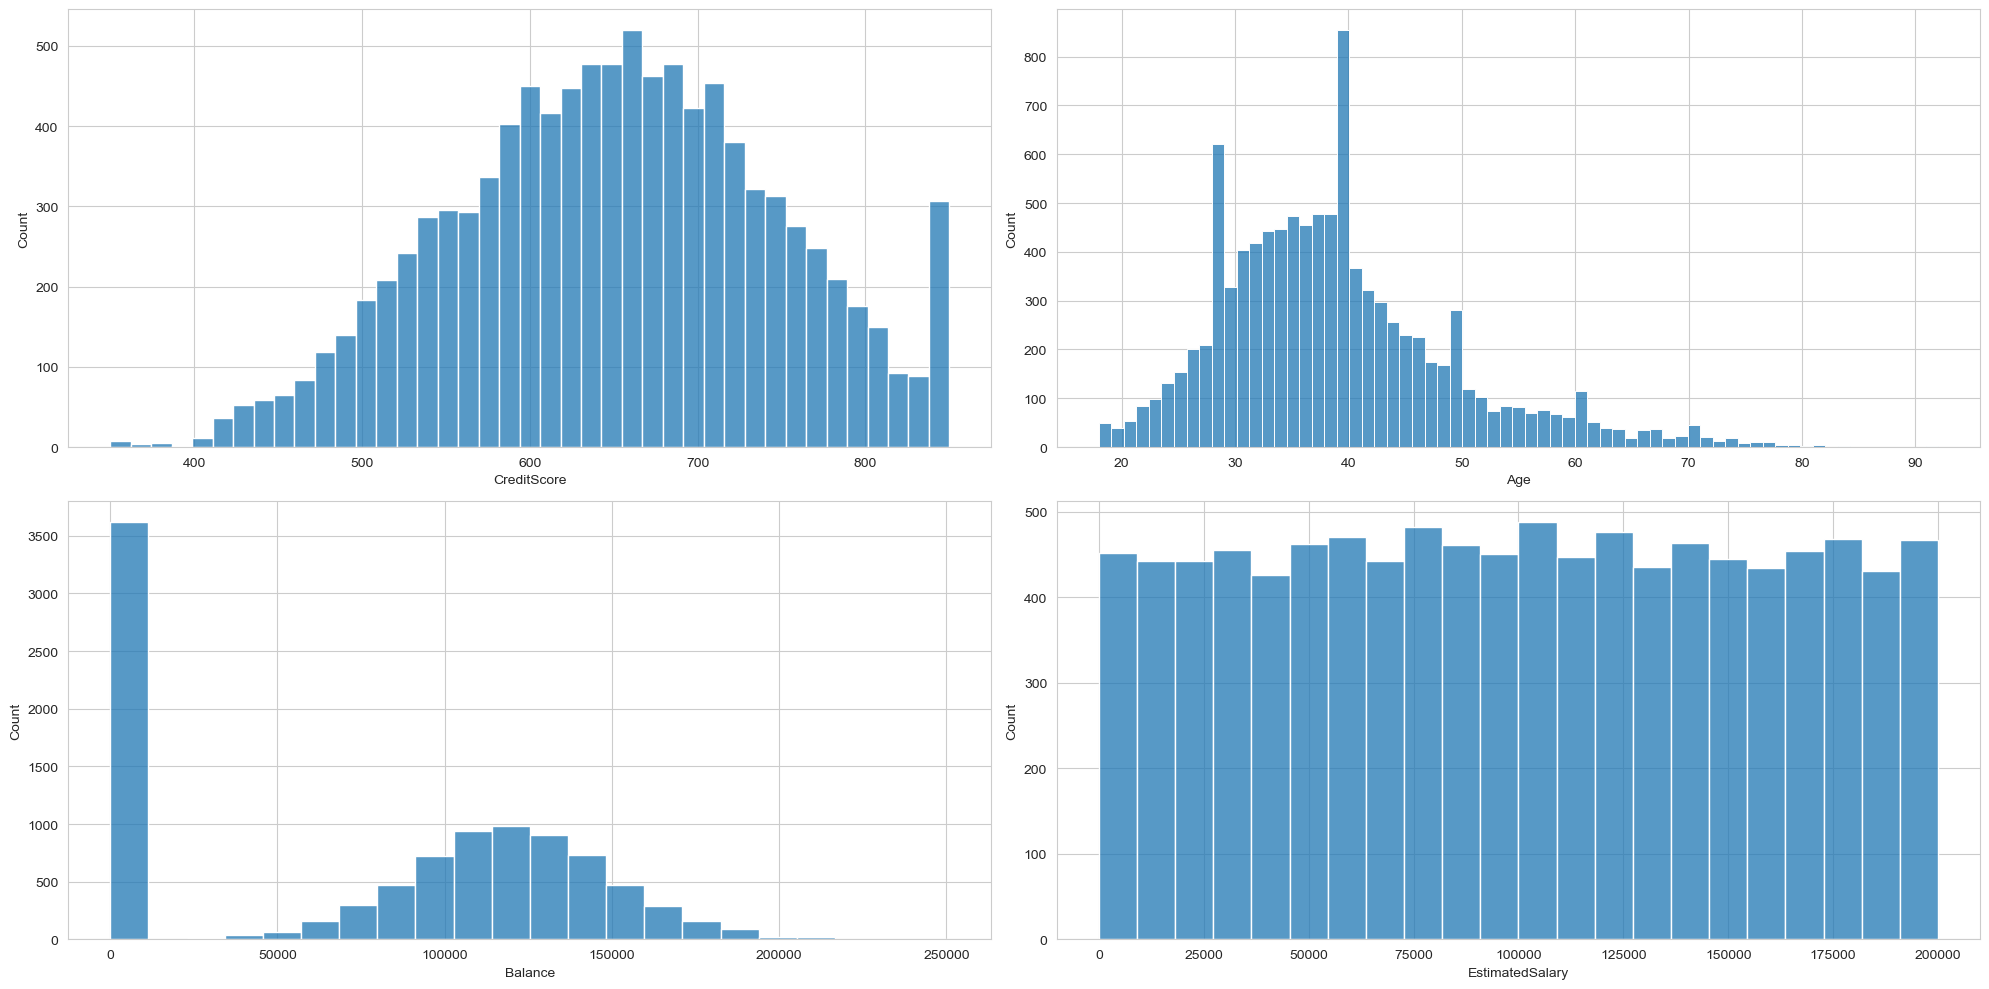

In [1856]:
# Create a grid of subplots based on the number of categorical variables
num_cat_vars = len(num_vars)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_cat_vars + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var,data=df, ax=axs[i])
    
# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [1857]:
#Working with nulll values
df.isnull()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [1858]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [1859]:
cheak_missing = df.isnull().sum() * 100/ df.shape[0]

In [1860]:
cheak_missing[cheak_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [1861]:
df.shape

(10000, 11)

In [1862]:
for col in df.select_dtypes(include=['object']).columns:
    #print column name and value
    print(f"{col}:{df[col].unique()}")

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [1863]:
from sklearn import preprocessing

In [1864]:
#loop to find object datatype
for col in df.select_dtypes(include=['object']).columns:
    
    #initilization of LabelEncoder
    label_encoding= preprocessing.LabelEncoder()
    
    #fiting encoder to unique value
    label_encoding.fit(df[col].unique())
    
    #transform the column using encoder
    df[col] = label_encoding.transform(df[col])
    
    #print column name and new value
    print(f"{col}:{df[col].unique()}")

Geography:[0 2 1]
Gender:[0 1]


In [1865]:
df.shape

(10000, 11)

<Axes: >

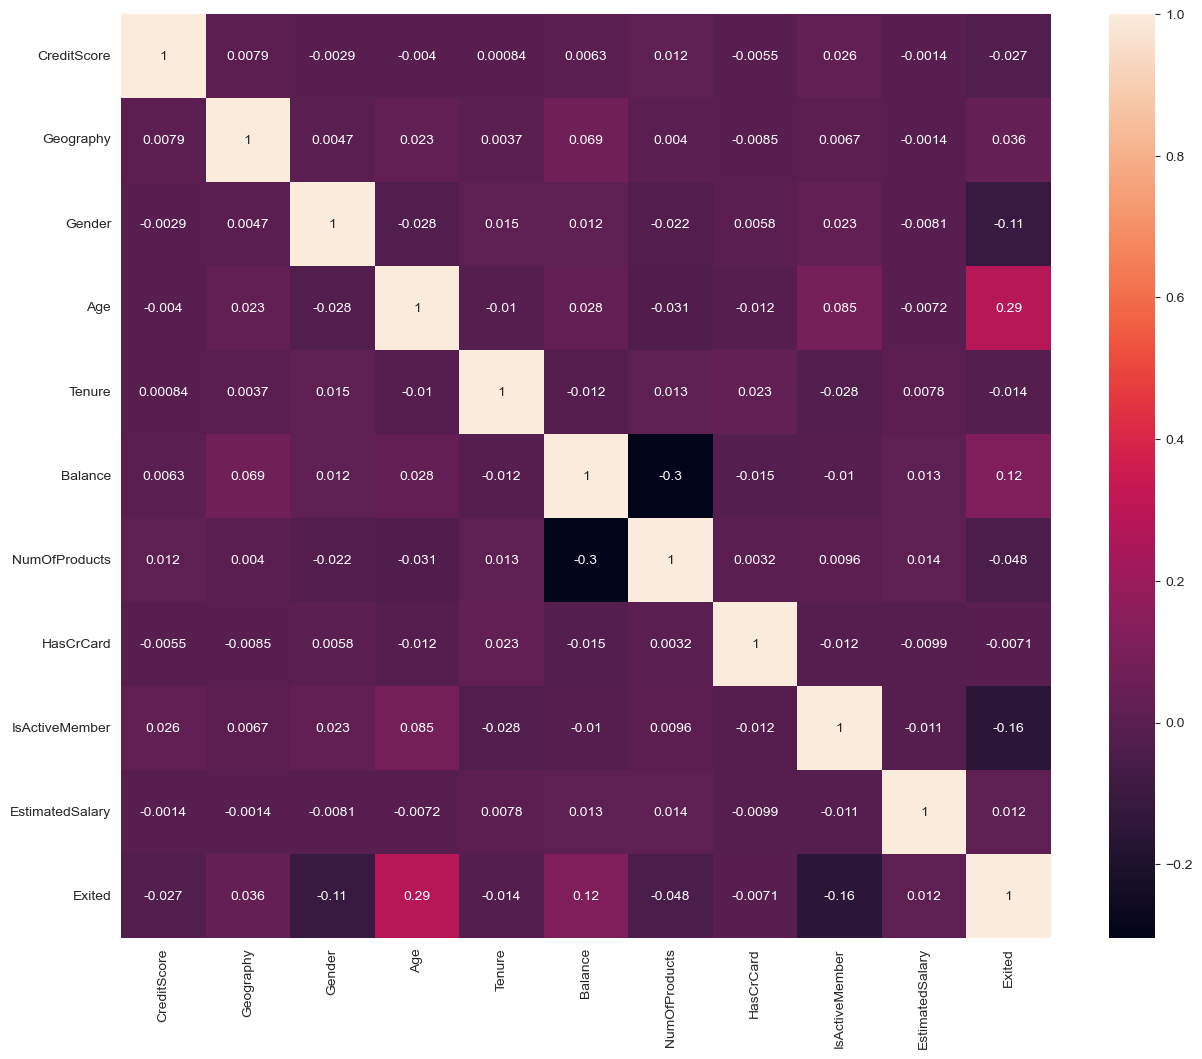

In [1866]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

In [1867]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000,1,1,1,101348.880,1
1,608,2,0,41,1,83807.860,1,0,1,112542.580,0
2,502,0,0,42,8,159660.800,3,1,0,113931.570,1
3,699,0,0,39,1,0.000,2,0,0,93826.630,0
4,850,2,0,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.000,2,1,0,96270.640,0
9996,516,0,1,35,10,57369.610,1,1,1,101699.770,0
9997,709,0,0,36,7,0.000,1,0,1,42085.580,1
9998,772,1,1,42,3,75075.310,2,1,0,92888.520,1


In [1868]:
X = df.drop("Exited",axis=1)
y = df['Exited']

# Preprocessing of Data
- Train | Test Split, Scalling

In [1869]:
from sklearn.model_selection import train_test_split

In [1870]:
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.20, random_state=seed)

In [1871]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,0,1,32,6,0.000,2,1,1,179093.260
1561,632,1,1,42,4,119624.600,2,1,1,195978.860
1670,559,2,1,24,3,114739.920,1,1,0,85891.020
6087,561,0,0,27,9,135637.000,1,1,0,153080.400
6669,517,0,1,56,9,142147.320,1,0,0,39488.040
...,...,...,...,...,...,...,...,...,...,...
5734,768,0,1,54,8,69712.740,1,1,1,69381.050
5191,682,0,0,58,1,0.000,1,1,1,706.500
5390,735,0,0,38,1,0.000,3,0,0,92220.120
860,667,0,1,43,8,190227.460,1,1,0,97508.040


In [1872]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32,3,96709.070,2,0,0,41788.370
4684,623,0,1,43,1,0.000,2,1,1,146379.300
1731,601,2,0,44,4,0.000,2,1,0,58561.310
4742,506,1,1,59,8,119152.100,2,1,1,170679.740
4521,560,2,0,27,7,124995.980,1,1,1,114669.790
...,...,...,...,...,...,...,...,...,...,...
6412,602,1,0,53,5,98268.840,1,0,1,45038.290
8285,609,0,1,25,10,0.000,1,0,1,109895.160
7853,730,0,0,47,7,0.000,1,1,0,33373.260
1095,692,0,1,29,4,0.000,1,1,0,76755.990


In [1873]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [1874]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [1875]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [1876]:
X_train

array([[ 0.35649971, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  1.50884694,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.9055496 , -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [1877]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32,3,96709.070,2,0,0,41788.370
4684,623,0,1,43,1,0.000,2,1,1,146379.300
1731,601,2,0,44,4,0.000,2,1,0,58561.310
4742,506,1,1,59,8,119152.100,2,1,1,170679.740
4521,560,2,0,27,7,124995.980,1,1,1,114669.790
...,...,...,...,...,...,...,...,...,...,...
6412,602,1,0,53,5,98268.840,1,0,1,45038.290
8285,609,0,1,25,10,0.000,1,0,1,109895.160
7853,730,0,0,47,7,0.000,1,1,0,33373.260
1095,692,0,1,29,4,0.000,1,1,0,76755.990


In [1878]:
X_test.shape

(2000, 10)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [1879]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [1880]:
#from keras.models import Sequential

In [1881]:
model=Sequential()

In [1882]:
#model.get_config()

In [1883]:
from keras.layers import Dense

In [1884]:
X.shape

(10000, 10)

In [1885]:
#layer 1 

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))

#layer 2
model.add(Dense( units=7 , activation ='relu'))

#layer 3
model.add(Dense( units=5 , activation ='relu'))
#layer 4
model.add(Dense( units=1 , activation ='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [1886]:
model.summary()

Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_369 (Dense)           (None, 36)                396       
                                                                 
 dense_370 (Dense)           (None, 7)                 259       
                                                                 
 dense_371 (Dense)           (None, 5)                 40        
                                                                 
 dense_372 (Dense)           (None, 1)                 6         
                                                                 
Total params: 701 (2.74 KB)
Trainable params: 701 (2.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1887]:
# Fitting the ANN to the Training set
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1
)

Epoch 1/1000
225/225 [==============================] - 0s 713us/step - loss: 0.6464 - accuracy: 0.7219 - val_loss: 0.5367 - val_accuracy: 0.8037
Epoch 2/1000
225/225 [==============================] - 0s 411us/step - loss: 0.4739 - accuracy: 0.7935 - val_loss: 0.4242 - val_accuracy: 0.8037
Epoch 3/1000
225/225 [==============================] - 0s 429us/step - loss: 0.4263 - accuracy: 0.8071 - val_loss: 0.3833 - val_accuracy: 0.8475
Epoch 4/1000
225/225 [==============================] - 0s 464us/step - loss: 0.3854 - accuracy: 0.8464 - val_loss: 0.3599 - val_accuracy: 0.8462
Epoch 5/1000
225/225 [==============================] - 0s 404us/step - loss: 0.3662 - accuracy: 0.8542 - val_loss: 0.3535 - val_accuracy: 0.8462
Epoch 6/1000
225/225 [==============================] - 0s 392us/step - loss: 0.3580 - accuracy: 0.8532 - val_loss: 0.3513 - val_accuracy: 0.8500
Epoch 7/1000
225/225 [==============================] - 0s 395us/step - loss: 0.3528 - accuracy: 0.8562 - val_loss: 0.3458 -

Epoch 57/1000
225/225 [==============================] - 0s 383us/step - loss: 0.3076 - accuracy: 0.8732 - val_loss: 0.3330 - val_accuracy: 0.8587
Epoch 58/1000
225/225 [==============================] - 0s 379us/step - loss: 0.3065 - accuracy: 0.8721 - val_loss: 0.3361 - val_accuracy: 0.8550
Epoch 59/1000
225/225 [==============================] - 0s 371us/step - loss: 0.3061 - accuracy: 0.8733 - val_loss: 0.3353 - val_accuracy: 0.8500
Epoch 60/1000
225/225 [==============================] - 0s 376us/step - loss: 0.3062 - accuracy: 0.8743 - val_loss: 0.3330 - val_accuracy: 0.8550
Epoch 61/1000
225/225 [==============================] - 0s 389us/step - loss: 0.3053 - accuracy: 0.8740 - val_loss: 0.3316 - val_accuracy: 0.8587
Epoch 62/1000
225/225 [==============================] - 0s 383us/step - loss: 0.3054 - accuracy: 0.8763 - val_loss: 0.3372 - val_accuracy: 0.8575
Epoch 63/1000
225/225 [==============================] - 0s 381us/step - loss: 0.3053 - accuracy: 0.8749 - val_loss: 0

225/225 [==============================] - 0s 387us/step - loss: 0.2924 - accuracy: 0.8814 - val_loss: 0.3500 - val_accuracy: 0.8487
Epoch 113/1000
225/225 [==============================] - 0s 379us/step - loss: 0.2926 - accuracy: 0.8778 - val_loss: 0.3469 - val_accuracy: 0.8487
Epoch 114/1000
225/225 [==============================] - 0s 384us/step - loss: 0.2924 - accuracy: 0.8794 - val_loss: 0.3529 - val_accuracy: 0.8450
Epoch 115/1000
225/225 [==============================] - 0s 383us/step - loss: 0.2915 - accuracy: 0.8790 - val_loss: 0.3535 - val_accuracy: 0.8475
Epoch 116/1000
225/225 [==============================] - 0s 384us/step - loss: 0.2923 - accuracy: 0.8781 - val_loss: 0.3488 - val_accuracy: 0.8487
Epoch 117/1000
225/225 [==============================] - 0s 381us/step - loss: 0.2923 - accuracy: 0.8790 - val_loss: 0.3533 - val_accuracy: 0.8475
Epoch 118/1000
225/225 [==============================] - 0s 379us/step - loss: 0.2913 - accuracy: 0.8794 - val_loss: 0.3500 - 

225/225 [==============================] - 0s 385us/step - loss: 0.2830 - accuracy: 0.8833 - val_loss: 0.3692 - val_accuracy: 0.8500
Epoch 168/1000
225/225 [==============================] - 0s 391us/step - loss: 0.2822 - accuracy: 0.8825 - val_loss: 0.3652 - val_accuracy: 0.8487
Epoch 169/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2819 - accuracy: 0.8838 - val_loss: 0.3657 - val_accuracy: 0.8450
Epoch 170/1000
225/225 [==============================] - 0s 382us/step - loss: 0.2812 - accuracy: 0.8836 - val_loss: 0.3657 - val_accuracy: 0.8537
Epoch 171/1000
225/225 [==============================] - 0s 385us/step - loss: 0.2816 - accuracy: 0.8849 - val_loss: 0.3811 - val_accuracy: 0.8500
Epoch 172/1000
225/225 [==============================] - 0s 388us/step - loss: 0.2830 - accuracy: 0.8829 - val_loss: 0.3652 - val_accuracy: 0.8525
Epoch 173/1000
225/225 [==============================] - 0s 384us/step - loss: 0.2818 - accuracy: 0.8842 - val_loss: 0.3717 - 

225/225 [==============================] - 0s 388us/step - loss: 0.2760 - accuracy: 0.8874 - val_loss: 0.3807 - val_accuracy: 0.8475
Epoch 223/1000
225/225 [==============================] - 0s 383us/step - loss: 0.2765 - accuracy: 0.8871 - val_loss: 0.3991 - val_accuracy: 0.8350
Epoch 224/1000
225/225 [==============================] - 0s 384us/step - loss: 0.2751 - accuracy: 0.8860 - val_loss: 0.3917 - val_accuracy: 0.8425
Epoch 225/1000
225/225 [==============================] - 0s 384us/step - loss: 0.2764 - accuracy: 0.8861 - val_loss: 0.3852 - val_accuracy: 0.8450
Epoch 226/1000
225/225 [==============================] - 0s 382us/step - loss: 0.2743 - accuracy: 0.8851 - val_loss: 0.3933 - val_accuracy: 0.8425
Epoch 227/1000
225/225 [==============================] - 0s 387us/step - loss: 0.2755 - accuracy: 0.8856 - val_loss: 0.3898 - val_accuracy: 0.8388
Epoch 228/1000
225/225 [==============================] - 0s 384us/step - loss: 0.2740 - accuracy: 0.8854 - val_loss: 0.3904 - 

225/225 [==============================] - 0s 386us/step - loss: 0.2695 - accuracy: 0.8883 - val_loss: 0.4112 - val_accuracy: 0.8375
Epoch 278/1000
225/225 [==============================] - 0s 384us/step - loss: 0.2693 - accuracy: 0.8903 - val_loss: 0.4051 - val_accuracy: 0.8475
Epoch 279/1000
225/225 [==============================] - 0s 382us/step - loss: 0.2696 - accuracy: 0.8871 - val_loss: 0.4034 - val_accuracy: 0.8450
Epoch 280/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2699 - accuracy: 0.8886 - val_loss: 0.4046 - val_accuracy: 0.8425
Epoch 281/1000
225/225 [==============================] - 0s 389us/step - loss: 0.2709 - accuracy: 0.8890 - val_loss: 0.4081 - val_accuracy: 0.8400
Epoch 282/1000
225/225 [==============================] - 0s 382us/step - loss: 0.2706 - accuracy: 0.8886 - val_loss: 0.4031 - val_accuracy: 0.8363
Epoch 283/1000
225/225 [==============================] - 0s 383us/step - loss: 0.2691 - accuracy: 0.8892 - val_loss: 0.3969 - 

225/225 [==============================] - 0s 422us/step - loss: 0.2670 - accuracy: 0.8890 - val_loss: 0.4315 - val_accuracy: 0.8388
Epoch 333/1000
225/225 [==============================] - 0s 407us/step - loss: 0.2661 - accuracy: 0.8922 - val_loss: 0.4255 - val_accuracy: 0.8375
Epoch 334/1000
225/225 [==============================] - 0s 389us/step - loss: 0.2657 - accuracy: 0.8899 - val_loss: 0.4191 - val_accuracy: 0.8363
Epoch 335/1000
225/225 [==============================] - 0s 384us/step - loss: 0.2655 - accuracy: 0.8918 - val_loss: 0.4139 - val_accuracy: 0.8375
Epoch 336/1000
225/225 [==============================] - 0s 382us/step - loss: 0.2645 - accuracy: 0.8904 - val_loss: 0.4123 - val_accuracy: 0.8450
Epoch 337/1000
225/225 [==============================] - 0s 401us/step - loss: 0.2656 - accuracy: 0.8896 - val_loss: 0.4132 - val_accuracy: 0.8375
Epoch 338/1000
225/225 [==============================] - 0s 403us/step - loss: 0.2648 - accuracy: 0.8903 - val_loss: 0.4250 - 

225/225 [==============================] - 0s 409us/step - loss: 0.2628 - accuracy: 0.8935 - val_loss: 0.4248 - val_accuracy: 0.8350
Epoch 388/1000
225/225 [==============================] - 0s 393us/step - loss: 0.2620 - accuracy: 0.8908 - val_loss: 0.4379 - val_accuracy: 0.8300
Epoch 389/1000
225/225 [==============================] - 0s 387us/step - loss: 0.2621 - accuracy: 0.8913 - val_loss: 0.4204 - val_accuracy: 0.8388
Epoch 390/1000
225/225 [==============================] - 0s 395us/step - loss: 0.2602 - accuracy: 0.8939 - val_loss: 0.4517 - val_accuracy: 0.8275
Epoch 391/1000
225/225 [==============================] - 0s 412us/step - loss: 0.2623 - accuracy: 0.8906 - val_loss: 0.4506 - val_accuracy: 0.8250
Epoch 392/1000
225/225 [==============================] - 0s 402us/step - loss: 0.2627 - accuracy: 0.8910 - val_loss: 0.4234 - val_accuracy: 0.8400
Epoch 393/1000
225/225 [==============================] - 0s 385us/step - loss: 0.2618 - accuracy: 0.8906 - val_loss: 0.4322 - 

225/225 [==============================] - 0s 389us/step - loss: 0.2597 - accuracy: 0.8942 - val_loss: 0.4319 - val_accuracy: 0.8363
Epoch 443/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2589 - accuracy: 0.8919 - val_loss: 0.4334 - val_accuracy: 0.8325
Epoch 444/1000
225/225 [==============================] - 0s 385us/step - loss: 0.2599 - accuracy: 0.8928 - val_loss: 0.4321 - val_accuracy: 0.8313
Epoch 445/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2578 - accuracy: 0.8935 - val_loss: 0.4344 - val_accuracy: 0.8325
Epoch 446/1000
225/225 [==============================] - 0s 387us/step - loss: 0.2581 - accuracy: 0.8931 - val_loss: 0.4411 - val_accuracy: 0.8338
Epoch 447/1000
225/225 [==============================] - 0s 389us/step - loss: 0.2585 - accuracy: 0.8925 - val_loss: 0.4417 - val_accuracy: 0.8363
Epoch 448/1000
225/225 [==============================] - 0s 387us/step - loss: 0.2592 - accuracy: 0.8929 - val_loss: 0.4339 - 

225/225 [==============================] - 0s 388us/step - loss: 0.2572 - accuracy: 0.8933 - val_loss: 0.4433 - val_accuracy: 0.8338
Epoch 498/1000
225/225 [==============================] - 0s 389us/step - loss: 0.2574 - accuracy: 0.8922 - val_loss: 0.4587 - val_accuracy: 0.8300
Epoch 499/1000
225/225 [==============================] - 0s 392us/step - loss: 0.2569 - accuracy: 0.8935 - val_loss: 0.4488 - val_accuracy: 0.8300
Epoch 500/1000
225/225 [==============================] - 0s 387us/step - loss: 0.2578 - accuracy: 0.8933 - val_loss: 0.4799 - val_accuracy: 0.8300
Epoch 501/1000
225/225 [==============================] - 0s 393us/step - loss: 0.2586 - accuracy: 0.8915 - val_loss: 0.4526 - val_accuracy: 0.8363
Epoch 502/1000
225/225 [==============================] - 0s 394us/step - loss: 0.2582 - accuracy: 0.8926 - val_loss: 0.4699 - val_accuracy: 0.8238
Epoch 503/1000
225/225 [==============================] - 0s 387us/step - loss: 0.2568 - accuracy: 0.8938 - val_loss: 0.4400 - 

225/225 [==============================] - 0s 393us/step - loss: 0.2535 - accuracy: 0.8932 - val_loss: 0.4660 - val_accuracy: 0.8350
Epoch 553/1000
225/225 [==============================] - 0s 388us/step - loss: 0.2533 - accuracy: 0.8942 - val_loss: 0.4558 - val_accuracy: 0.8363
Epoch 554/1000
225/225 [==============================] - 0s 389us/step - loss: 0.2566 - accuracy: 0.8910 - val_loss: 0.4816 - val_accuracy: 0.8275
Epoch 555/1000
225/225 [==============================] - 0s 390us/step - loss: 0.2547 - accuracy: 0.8958 - val_loss: 0.4625 - val_accuracy: 0.8338
Epoch 556/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2529 - accuracy: 0.8932 - val_loss: 0.4575 - val_accuracy: 0.8350
Epoch 557/1000
225/225 [==============================] - 0s 388us/step - loss: 0.2548 - accuracy: 0.8939 - val_loss: 0.4517 - val_accuracy: 0.8350
Epoch 558/1000
225/225 [==============================] - 0s 387us/step - loss: 0.2544 - accuracy: 0.8939 - val_loss: 0.4604 - 

225/225 [==============================] - 0s 398us/step - loss: 0.2512 - accuracy: 0.8949 - val_loss: 0.4897 - val_accuracy: 0.8288
Epoch 608/1000
225/225 [==============================] - 0s 407us/step - loss: 0.2515 - accuracy: 0.8963 - val_loss: 0.4700 - val_accuracy: 0.8288
Epoch 609/1000
225/225 [==============================] - 0s 388us/step - loss: 0.2505 - accuracy: 0.8968 - val_loss: 0.4728 - val_accuracy: 0.8363
Epoch 610/1000
225/225 [==============================] - 0s 385us/step - loss: 0.2502 - accuracy: 0.8981 - val_loss: 0.4778 - val_accuracy: 0.8313
Epoch 611/1000
225/225 [==============================] - 0s 385us/step - loss: 0.2500 - accuracy: 0.8969 - val_loss: 0.4675 - val_accuracy: 0.8325
Epoch 612/1000
225/225 [==============================] - 0s 385us/step - loss: 0.2514 - accuracy: 0.8961 - val_loss: 0.4942 - val_accuracy: 0.8338
Epoch 613/1000
225/225 [==============================] - 0s 384us/step - loss: 0.2497 - accuracy: 0.8968 - val_loss: 0.4649 - 

225/225 [==============================] - 0s 391us/step - loss: 0.2478 - accuracy: 0.8969 - val_loss: 0.4891 - val_accuracy: 0.8350
Epoch 663/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2484 - accuracy: 0.8956 - val_loss: 0.5092 - val_accuracy: 0.8325
Epoch 664/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2542 - accuracy: 0.8953 - val_loss: 0.4968 - val_accuracy: 0.8350
Epoch 665/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2493 - accuracy: 0.8968 - val_loss: 0.4571 - val_accuracy: 0.8375
Epoch 666/1000
225/225 [==============================] - 0s 388us/step - loss: 0.2499 - accuracy: 0.8968 - val_loss: 0.4752 - val_accuracy: 0.8375
Epoch 667/1000
225/225 [==============================] - 0s 405us/step - loss: 0.2462 - accuracy: 0.8993 - val_loss: 0.5026 - val_accuracy: 0.8300
Epoch 668/1000
225/225 [==============================] - 0s 396us/step - loss: 0.2475 - accuracy: 0.8971 - val_loss: 0.5088 - 

225/225 [==============================] - 0s 405us/step - loss: 0.2467 - accuracy: 0.8967 - val_loss: 0.5009 - val_accuracy: 0.8350
Epoch 718/1000
225/225 [==============================] - 0s 389us/step - loss: 0.2494 - accuracy: 0.8963 - val_loss: 0.4863 - val_accuracy: 0.8350
Epoch 719/1000
225/225 [==============================] - 0s 383us/step - loss: 0.2467 - accuracy: 0.8979 - val_loss: 0.5133 - val_accuracy: 0.8263
Epoch 720/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2476 - accuracy: 0.8999 - val_loss: 0.4969 - val_accuracy: 0.8288
Epoch 721/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2479 - accuracy: 0.8972 - val_loss: 0.4693 - val_accuracy: 0.8350
Epoch 722/1000
225/225 [==============================] - 0s 388us/step - loss: 0.2472 - accuracy: 0.8992 - val_loss: 0.4578 - val_accuracy: 0.8325
Epoch 723/1000
225/225 [==============================] - 0s 385us/step - loss: 0.2475 - accuracy: 0.8968 - val_loss: 0.4901 - 

225/225 [==============================] - 0s 385us/step - loss: 0.2466 - accuracy: 0.8971 - val_loss: 0.4855 - val_accuracy: 0.8325
Epoch 773/1000
225/225 [==============================] - 0s 393us/step - loss: 0.2476 - accuracy: 0.8969 - val_loss: 0.4581 - val_accuracy: 0.8363
Epoch 774/1000
225/225 [==============================] - 0s 389us/step - loss: 0.2480 - accuracy: 0.8961 - val_loss: 0.4694 - val_accuracy: 0.8338
Epoch 775/1000
225/225 [==============================] - 0s 385us/step - loss: 0.2460 - accuracy: 0.8985 - val_loss: 0.4760 - val_accuracy: 0.8350
Epoch 776/1000
225/225 [==============================] - 0s 391us/step - loss: 0.2467 - accuracy: 0.8965 - val_loss: 0.4630 - val_accuracy: 0.8350
Epoch 777/1000
225/225 [==============================] - 0s 388us/step - loss: 0.2468 - accuracy: 0.8958 - val_loss: 0.4935 - val_accuracy: 0.8275
Epoch 778/1000
225/225 [==============================] - 0s 387us/step - loss: 0.2450 - accuracy: 0.8983 - val_loss: 0.4629 - 

225/225 [==============================] - 0s 389us/step - loss: 0.2460 - accuracy: 0.8989 - val_loss: 0.4667 - val_accuracy: 0.8313
Epoch 828/1000
225/225 [==============================] - 0s 392us/step - loss: 0.2444 - accuracy: 0.8965 - val_loss: 0.4969 - val_accuracy: 0.8338
Epoch 829/1000
225/225 [==============================] - 0s 388us/step - loss: 0.2437 - accuracy: 0.9003 - val_loss: 0.4750 - val_accuracy: 0.8400
Epoch 830/1000
225/225 [==============================] - 0s 384us/step - loss: 0.2451 - accuracy: 0.8982 - val_loss: 0.4746 - val_accuracy: 0.8388
Epoch 831/1000
225/225 [==============================] - 0s 391us/step - loss: 0.2428 - accuracy: 0.8997 - val_loss: 0.4917 - val_accuracy: 0.8313
Epoch 832/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2436 - accuracy: 0.8988 - val_loss: 0.4995 - val_accuracy: 0.8288
Epoch 833/1000
225/225 [==============================] - 0s 385us/step - loss: 0.2437 - accuracy: 0.8979 - val_loss: 0.4764 - 

225/225 [==============================] - 0s 387us/step - loss: 0.2431 - accuracy: 0.8997 - val_loss: 0.4752 - val_accuracy: 0.8325
Epoch 883/1000
225/225 [==============================] - 0s 388us/step - loss: 0.2400 - accuracy: 0.9026 - val_loss: 0.4888 - val_accuracy: 0.8300
Epoch 884/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2428 - accuracy: 0.9003 - val_loss: 0.4853 - val_accuracy: 0.8300
Epoch 885/1000
225/225 [==============================] - 0s 391us/step - loss: 0.2424 - accuracy: 0.8999 - val_loss: 0.5078 - val_accuracy: 0.8250
Epoch 886/1000
225/225 [==============================] - 0s 387us/step - loss: 0.2444 - accuracy: 0.8988 - val_loss: 0.4797 - val_accuracy: 0.8338
Epoch 887/1000
225/225 [==============================] - 0s 388us/step - loss: 0.2447 - accuracy: 0.8985 - val_loss: 0.4738 - val_accuracy: 0.8325
Epoch 888/1000
225/225 [==============================] - 0s 385us/step - loss: 0.2430 - accuracy: 0.8982 - val_loss: 0.4940 - 

225/225 [==============================] - 0s 389us/step - loss: 0.2408 - accuracy: 0.9022 - val_loss: 0.4770 - val_accuracy: 0.8363
Epoch 938/1000
225/225 [==============================] - 0s 388us/step - loss: 0.2439 - accuracy: 0.9000 - val_loss: 0.4924 - val_accuracy: 0.8300
Epoch 939/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2424 - accuracy: 0.9008 - val_loss: 0.4841 - val_accuracy: 0.8325
Epoch 940/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2436 - accuracy: 0.8993 - val_loss: 0.4716 - val_accuracy: 0.8325
Epoch 941/1000
225/225 [==============================] - 0s 389us/step - loss: 0.2421 - accuracy: 0.8999 - val_loss: 0.4637 - val_accuracy: 0.8350
Epoch 942/1000
225/225 [==============================] - 0s 384us/step - loss: 0.2413 - accuracy: 0.9028 - val_loss: 0.5003 - val_accuracy: 0.8275
Epoch 943/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2413 - accuracy: 0.9015 - val_loss: 0.4687 - 

225/225 [==============================] - 0s 391us/step - loss: 0.2402 - accuracy: 0.9021 - val_loss: 0.4994 - val_accuracy: 0.8375
Epoch 993/1000
225/225 [==============================] - 0s 390us/step - loss: 0.2384 - accuracy: 0.9038 - val_loss: 0.4764 - val_accuracy: 0.8338
Epoch 994/1000
225/225 [==============================] - 0s 386us/step - loss: 0.2410 - accuracy: 0.9003 - val_loss: 0.5026 - val_accuracy: 0.8275
Epoch 995/1000
225/225 [==============================] - 0s 388us/step - loss: 0.2428 - accuracy: 0.8997 - val_loss: 0.4686 - val_accuracy: 0.8375
Epoch 996/1000
225/225 [==============================] - 0s 387us/step - loss: 0.2402 - accuracy: 0.9015 - val_loss: 0.4756 - val_accuracy: 0.8338
Epoch 997/1000
225/225 [==============================] - 0s 385us/step - loss: 0.2441 - accuracy: 0.9014 - val_loss: 0.4862 - val_accuracy: 0.8338
Epoch 998/1000
225/225 [==============================] - 0s 388us/step - loss: 0.2390 - accuracy: 0.9004 - val_loss: 0.5095 - 

In [1888]:
model.get_config()

{'name': 'sequential_123',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 10),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_369_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_369',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 10),
    'units': 36,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_con

In [1889]:
model.get_weights()

[array([[ 4.08752799e-01, -1.75240338e-01,  8.51651058e-02,
          7.89269626e-01, -2.08098516e-01,  4.34333049e-02,
          3.42161775e-01, -9.94011641e-01, -7.79668912e-02,
          8.94109458e-02, -5.77489257e-01,  8.66639838e-02,
         -2.25503549e-01, -2.73291916e-01, -4.57458615e-01,
         -8.22108611e-02,  2.80201077e-01,  5.57977706e-02,
          8.69506896e-01, -1.07892178e-01, -4.55878168e-01,
          8.60409319e-01,  7.81258523e-01, -4.70770329e-01,
          2.38027230e-01, -2.68659204e-01,  5.54186068e-02,
          1.24636546e-01, -3.14148784e-01,  2.21574977e-02,
         -8.16944778e-01,  3.62668216e-01, -3.00932735e-01,
          5.33130586e-01, -8.88455629e-01, -1.06251013e+00],
        [ 5.53845286e-01, -2.12827653e-01,  1.07246244e+00,
          3.38954508e-01, -4.03637052e-01,  2.26810411e-01,
         -6.93902493e-01, -1.15745209e-01,  3.53816777e-01,
          2.30244678e-02, -4.12603021e-01, -1.25527769e-01,
         -6.80845976e-01,  5.69357932e-

In [1890]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.646,0.722,0.537,0.804
1,0.474,0.793,0.424,0.804
2,0.426,0.807,0.383,0.848
3,0.385,0.846,0.360,0.846
4,0.366,0.854,0.353,0.846


In [1891]:
model.evaluate(X_test, y_test, verbose=0)

[23755.275390625, 0.8034999966621399]

In [1892]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  23755.275390625
accuracy:  0.8034999966621399


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

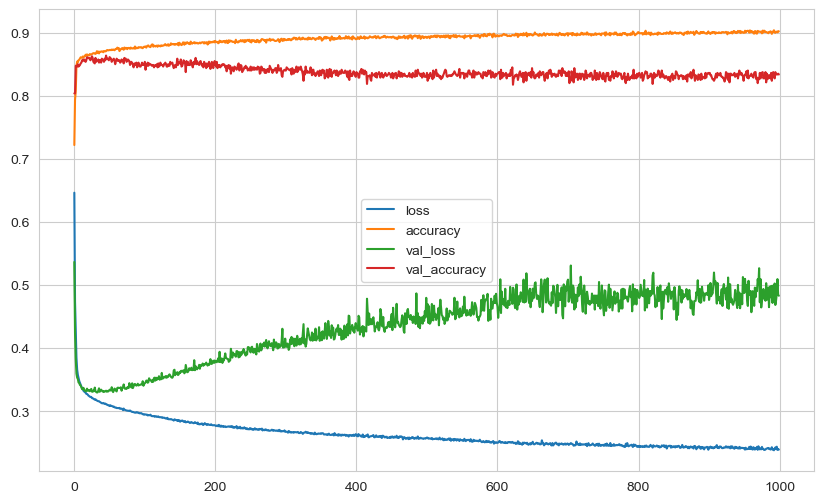

In [1893]:
loss_df.plot()
plt.show()

In [1894]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 279us/step
[[1607    0]
 [ 393    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



In [1895]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1607    0]
 [ 393    0]]


63/63 [==============================] - 0s 273us/step


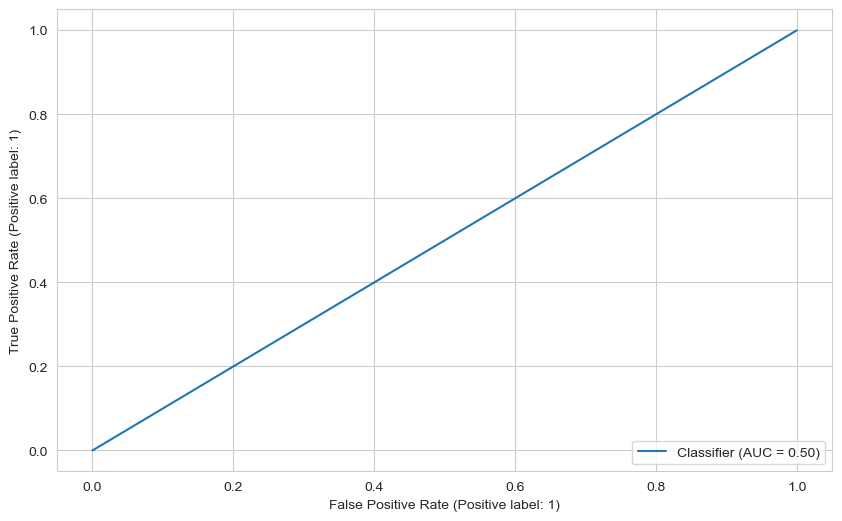

In [1896]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [1897]:
roc_auc_score(y_test, y_pred_proba)

0.49968886123210954

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [1901]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [1902]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight("balanced", classes = np.unique(y_train), y = y_train)
class_weights = {0 : class_weights[0], 1 : class_weights[1]}
class_weights

{0: 0.6293266205160478, 1: 2.4330900243309004}

In [1903]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 300, 
          verbose = 1, 
          class_weight = class_weights)

Epoch 1/300
57/57 [==============================] - 0s 2ms/step - loss: 0.7211 - recall: 0.8265 - val_loss: 0.7144 - val_recall: 0.6752
Epoch 2/300
57/57 [==============================] - 0s 689us/step - loss: 0.6620 - recall: 0.7317 - val_loss: 0.6947 - val_recall: 0.7325
Epoch 3/300
57/57 [==============================] - 0s 628us/step - loss: 0.6287 - recall: 0.7633 - val_loss: 0.6669 - val_recall: 0.7389
Epoch 4/300
57/57 [==============================] - 0s 612us/step - loss: 0.6005 - recall: 0.7350 - val_loss: 0.6264 - val_recall: 0.7452
Epoch 5/300
57/57 [==============================] - 0s 645us/step - loss: 0.5759 - recall: 0.7350 - val_loss: 0.5765 - val_recall: 0.6943
Epoch 6/300
57/57 [==============================] - 0s 623us/step - loss: 0.5542 - recall: 0.7371 - val_loss: 0.5730 - val_recall: 0.7516
Epoch 7/300
57/57 [==============================] - 0s 672us/step - loss: 0.5355 - recall: 0.7579 - val_loss: 0.5423 - val_recall: 0.7389
Epoch 8/300
57/57 [==========

57/57 [==============================] - 0s 675us/step - loss: 0.4466 - recall: 0.7774 - val_loss: 0.4852 - val_recall: 0.7580
Epoch 60/300
57/57 [==============================] - 0s 801us/step - loss: 0.4463 - recall: 0.7835 - val_loss: 0.4680 - val_recall: 0.7516
Epoch 61/300
57/57 [==============================] - 0s 767us/step - loss: 0.4442 - recall: 0.7814 - val_loss: 0.4542 - val_recall: 0.7261
Epoch 62/300
57/57 [==============================] - 0s 725us/step - loss: 0.4445 - recall: 0.7740 - val_loss: 0.4548 - val_recall: 0.7197
Epoch 63/300
57/57 [==============================] - 0s 730us/step - loss: 0.4438 - recall: 0.7774 - val_loss: 0.4765 - val_recall: 0.7580
Epoch 64/300
57/57 [==============================] - 0s 652us/step - loss: 0.4436 - recall: 0.7754 - val_loss: 0.4554 - val_recall: 0.7325
Epoch 65/300
57/57 [==============================] - 0s 603us/step - loss: 0.4432 - recall: 0.7747 - val_loss: 0.4667 - val_recall: 0.7452
Epoch 66/300
57/57 [=============

57/57 [==============================] - 0s 615us/step - loss: 0.4284 - recall: 0.7693 - val_loss: 0.4721 - val_recall: 0.7643
Epoch 118/300
57/57 [==============================] - 0s 615us/step - loss: 0.4287 - recall: 0.7882 - val_loss: 0.4665 - val_recall: 0.7580
Epoch 119/300
57/57 [==============================] - 0s 602us/step - loss: 0.4257 - recall: 0.7828 - val_loss: 0.4442 - val_recall: 0.6943
Epoch 120/300
57/57 [==============================] - 0s 602us/step - loss: 0.4263 - recall: 0.7868 - val_loss: 0.4465 - val_recall: 0.7325
Epoch 121/300
57/57 [==============================] - 0s 601us/step - loss: 0.4264 - recall: 0.7787 - val_loss: 0.4938 - val_recall: 0.7962
Epoch 122/300
57/57 [==============================] - 0s 609us/step - loss: 0.4258 - recall: 0.7949 - val_loss: 0.4547 - val_recall: 0.7452
Epoch 123/300
57/57 [==============================] - 0s 594us/step - loss: 0.4272 - recall: 0.7821 - val_loss: 0.4771 - val_recall: 0.7707
Epoch 124/300
57/57 [======

57/57 [==============================] - 0s 614us/step - loss: 0.4185 - recall: 0.8003 - val_loss: 0.4553 - val_recall: 0.7006
Epoch 176/300
57/57 [==============================] - 0s 614us/step - loss: 0.4180 - recall: 0.7828 - val_loss: 0.4691 - val_recall: 0.7197
Epoch 177/300
57/57 [==============================] - 0s 579us/step - loss: 0.4175 - recall: 0.7882 - val_loss: 0.4799 - val_recall: 0.7580
Epoch 178/300
57/57 [==============================] - 0s 588us/step - loss: 0.4173 - recall: 0.7888 - val_loss: 0.4586 - val_recall: 0.7134
Epoch 179/300
57/57 [==============================] - 0s 598us/step - loss: 0.4173 - recall: 0.7787 - val_loss: 0.4644 - val_recall: 0.7325
Epoch 180/300
57/57 [==============================] - 0s 596us/step - loss: 0.4178 - recall: 0.7861 - val_loss: 0.5020 - val_recall: 0.7834
Epoch 181/300
57/57 [==============================] - 0s 591us/step - loss: 0.4177 - recall: 0.7855 - val_loss: 0.4579 - val_recall: 0.7070
Epoch 182/300
57/57 [======

57/57 [==============================] - 0s 578us/step - loss: 0.4108 - recall: 0.7935 - val_loss: 0.4673 - val_recall: 0.7325
Epoch 234/300
57/57 [==============================] - 0s 582us/step - loss: 0.4109 - recall: 0.8009 - val_loss: 0.4494 - val_recall: 0.7070
Epoch 235/300
57/57 [==============================] - 0s 576us/step - loss: 0.4101 - recall: 0.7935 - val_loss: 0.4719 - val_recall: 0.7325
Epoch 236/300
57/57 [==============================] - 0s 568us/step - loss: 0.4106 - recall: 0.7983 - val_loss: 0.4643 - val_recall: 0.7325
Epoch 237/300
57/57 [==============================] - 0s 572us/step - loss: 0.4109 - recall: 0.7915 - val_loss: 0.4586 - val_recall: 0.7261
Epoch 238/300
57/57 [==============================] - 0s 596us/step - loss: 0.4103 - recall: 0.7949 - val_loss: 0.4835 - val_recall: 0.7580
Epoch 239/300
57/57 [==============================] - 0s 586us/step - loss: 0.4114 - recall: 0.8003 - val_loss: 0.4254 - val_recall: 0.6815
Epoch 240/300
57/57 [======

57/57 [==============================] - 0s 596us/step - loss: 0.4043 - recall: 0.8009 - val_loss: 0.4556 - val_recall: 0.7070
Epoch 292/300
57/57 [==============================] - 0s 601us/step - loss: 0.4042 - recall: 0.8050 - val_loss: 0.4646 - val_recall: 0.7261
Epoch 293/300
57/57 [==============================] - 0s 582us/step - loss: 0.4043 - recall: 0.7969 - val_loss: 0.4460 - val_recall: 0.6943
Epoch 294/300
57/57 [==============================] - 0s 607us/step - loss: 0.4055 - recall: 0.8104 - val_loss: 0.4354 - val_recall: 0.6688
Epoch 295/300
57/57 [==============================] - 0s 606us/step - loss: 0.4043 - recall: 0.8009 - val_loss: 0.4622 - val_recall: 0.7261
Epoch 296/300
57/57 [==============================] - 0s 580us/step - loss: 0.4030 - recall: 0.7983 - val_loss: 0.4811 - val_recall: 0.7516
Epoch 297/300
57/57 [==============================] - 0s 610us/step - loss: 0.4043 - recall: 0.8063 - val_loss: 0.4283 - val_recall: 0.6306
Epoch 298/300
57/57 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

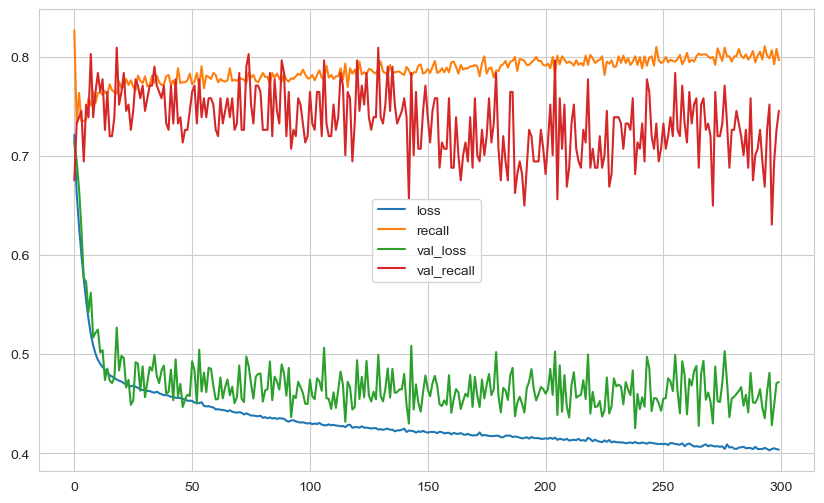

In [1904]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [1905]:
model.evaluate(X_test, y_test, verbose=0)

[97889.328125, 1.0]

In [1906]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  97889.328125
accuracy:  1.0


In [1907]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


63/63 [==============================] - 0s 275us/step
[[   0 1607]
 [   0  393]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.16      2000
weighted avg       0.04      0.20      0.06      2000



In [1908]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   0 1607]
 [   0  393]]


63/63 [==============================] - 0s 285us/step


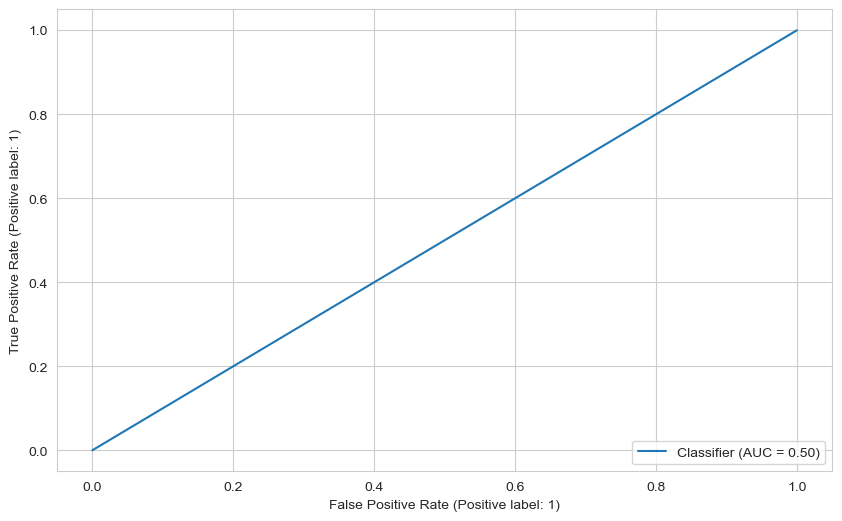

In [1909]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [1910]:
roc_auc_score(y_test, y_pred_proba)

0.5

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [1911]:
from tensorflow.keras.optimizers import Adam

In [1912]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [1913]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [1914]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
225/225 [==============================] - 0s 624us/step - loss: 0.4279 - accuracy: 0.8136 - val_loss: 0.3691 - val_accuracy: 0.8562
Epoch 2/1000
225/225 [==============================] - 0s 422us/step - loss: 0.3746 - accuracy: 0.8481 - val_loss: 0.3553 - val_accuracy: 0.8600
Epoch 3/1000
225/225 [==============================] - 0s 411us/step - loss: 0.3530 - accuracy: 0.8546 - val_loss: 0.3519 - val_accuracy: 0.8537
Epoch 4/1000
225/225 [==============================] - 0s 402us/step - loss: 0.3440 - accuracy: 0.8567 - val_loss: 0.3483 - val_accuracy: 0.8525
Epoch 5/1000
225/225 [==============================] - 0s 405us/step - loss: 0.3407 - accuracy: 0.8628 - val_loss: 0.3439 - val_accuracy: 0.8550
Epoch 6/1000
225/225 [==============================] - 0s 399us/step - loss: 0.3403 - accuracy: 0.8615 - val_loss: 0.3506 - val_accuracy: 0.8487
Epoch 7/1000
225/225 [==============================] - 0s 393us/step - loss: 0.3368 - accuracy: 0.8624 - val_loss: 0.3477 -

<Axes: >

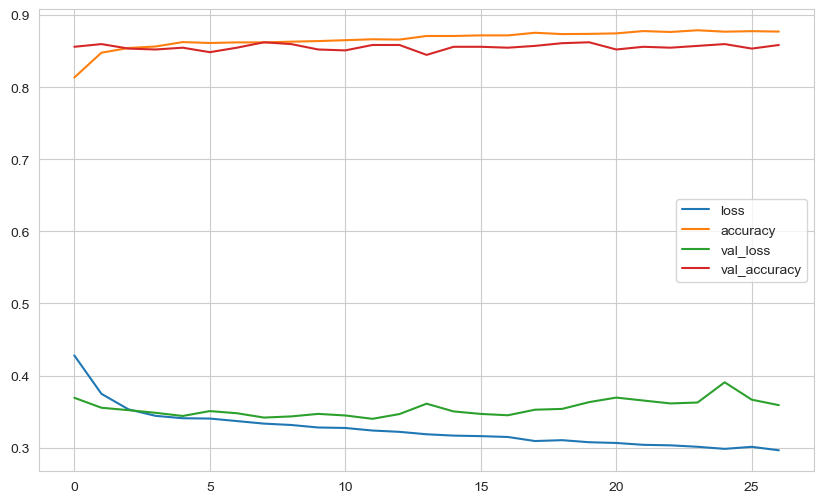

In [1915]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Add Dropout Layer

In [1916]:
from tensorflow.keras.layers import Dropout

In [1917]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [1919]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 400, 
          verbose = 1, 
          class_weight = class_weights)

Epoch 1/400
57/57 [==============================] - 0s 1ms/step - loss: 0.5073 - accuracy: 0.7767 - val_loss: 0.4608 - val_accuracy: 0.8025
Epoch 2/400
57/57 [==============================] - 0s 711us/step - loss: 0.5039 - accuracy: 0.7778 - val_loss: 0.4563 - val_accuracy: 0.8100
Epoch 3/400
57/57 [==============================] - 0s 689us/step - loss: 0.5045 - accuracy: 0.7708 - val_loss: 0.4596 - val_accuracy: 0.7825
Epoch 4/400
57/57 [==============================] - 0s 667us/step - loss: 0.4914 - accuracy: 0.7703 - val_loss: 0.4492 - val_accuracy: 0.7987
Epoch 5/400
57/57 [==============================] - 0s 649us/step - loss: 0.5084 - accuracy: 0.7654 - val_loss: 0.4481 - val_accuracy: 0.8000
Epoch 6/400
57/57 [==============================] - 0s 652us/step - loss: 0.4999 - accuracy: 0.7800 - val_loss: 0.4515 - val_accuracy: 0.8025
Epoch 7/400
57/57 [==============================] - 0s 654us/step - loss: 0.4996 - accuracy: 0.7690 - val_loss: 0.4533 - val_accuracy: 0.7962
E

Epoch 58/400
57/57 [==============================] - 0s 685us/step - loss: 0.5074 - accuracy: 0.7740 - val_loss: 0.4564 - val_accuracy: 0.7925
Epoch 59/400
57/57 [==============================] - 0s 644us/step - loss: 0.5038 - accuracy: 0.7746 - val_loss: 0.4607 - val_accuracy: 0.7850
Epoch 60/400
57/57 [==============================] - 0s 675us/step - loss: 0.5075 - accuracy: 0.7654 - val_loss: 0.4532 - val_accuracy: 0.7925
Epoch 61/400
57/57 [==============================] - 0s 663us/step - loss: 0.5135 - accuracy: 0.7717 - val_loss: 0.4531 - val_accuracy: 0.8012
Epoch 62/400
57/57 [==============================] - 0s 679us/step - loss: 0.5062 - accuracy: 0.7713 - val_loss: 0.4471 - val_accuracy: 0.8000
Epoch 63/400
57/57 [==============================] - 0s 716us/step - loss: 0.4983 - accuracy: 0.7760 - val_loss: 0.4520 - val_accuracy: 0.7825
Epoch 64/400
57/57 [==============================] - 0s 688us/step - loss: 0.5019 - accuracy: 0.7733 - val_loss: 0.4505 - val_accuracy:

Epoch 115/400
57/57 [==============================] - 0s 832us/step - loss: 0.4930 - accuracy: 0.7703 - val_loss: 0.4489 - val_accuracy: 0.7850
Epoch 116/400
57/57 [==============================] - 0s 948us/step - loss: 0.5096 - accuracy: 0.7608 - val_loss: 0.4561 - val_accuracy: 0.7713
Epoch 117/400
57/57 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7658 - val_loss: 0.4526 - val_accuracy: 0.7713
Epoch 118/400
57/57 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7672 - val_loss: 0.4441 - val_accuracy: 0.7837
Epoch 119/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7661 - val_loss: 0.4436 - val_accuracy: 0.7912
Epoch 120/400
57/57 [==============================] - 0s 884us/step - loss: 0.5060 - accuracy: 0.7710 - val_loss: 0.4479 - val_accuracy: 0.7937
Epoch 121/400
57/57 [==============================] - 0s 783us/step - loss: 0.5067 - accuracy: 0.7750 - val_loss: 0.4595 - val_accuracy

57/57 [==============================] - 0s 626us/step - loss: 0.4979 - accuracy: 0.7704 - val_loss: 0.4506 - val_accuracy: 0.7812
Epoch 172/400
57/57 [==============================] - 0s 654us/step - loss: 0.4898 - accuracy: 0.7804 - val_loss: 0.4507 - val_accuracy: 0.7825
Epoch 173/400
57/57 [==============================] - 0s 647us/step - loss: 0.5064 - accuracy: 0.7703 - val_loss: 0.4466 - val_accuracy: 0.7987
Epoch 174/400
57/57 [==============================] - 0s 633us/step - loss: 0.5047 - accuracy: 0.7722 - val_loss: 0.4428 - val_accuracy: 0.7937
Epoch 175/400
57/57 [==============================] - 0s 631us/step - loss: 0.4926 - accuracy: 0.7729 - val_loss: 0.4456 - val_accuracy: 0.7950
Epoch 176/400
57/57 [==============================] - 0s 630us/step - loss: 0.4954 - accuracy: 0.7731 - val_loss: 0.4416 - val_accuracy: 0.8025
Epoch 177/400
57/57 [==============================] - 0s 648us/step - loss: 0.4989 - accuracy: 0.7800 - val_loss: 0.4443 - val_accuracy: 0.7950

57/57 [==============================] - 0s 632us/step - loss: 0.4959 - accuracy: 0.7751 - val_loss: 0.4436 - val_accuracy: 0.8000
Epoch 228/400
57/57 [==============================] - 0s 656us/step - loss: 0.5006 - accuracy: 0.7674 - val_loss: 0.4508 - val_accuracy: 0.7925
Epoch 229/400
57/57 [==============================] - 0s 641us/step - loss: 0.4937 - accuracy: 0.7772 - val_loss: 0.4416 - val_accuracy: 0.8012
Epoch 230/400
57/57 [==============================] - 0s 638us/step - loss: 0.5022 - accuracy: 0.7742 - val_loss: 0.4492 - val_accuracy: 0.7912
Epoch 231/400
57/57 [==============================] - 0s 651us/step - loss: 0.5002 - accuracy: 0.7675 - val_loss: 0.4468 - val_accuracy: 0.7900
Epoch 232/400
57/57 [==============================] - 0s 670us/step - loss: 0.5027 - accuracy: 0.7735 - val_loss: 0.4526 - val_accuracy: 0.8000
Epoch 233/400
57/57 [==============================] - 0s 647us/step - loss: 0.4889 - accuracy: 0.7800 - val_loss: 0.4479 - val_accuracy: 0.7925

57/57 [==============================] - 0s 631us/step - loss: 0.4992 - accuracy: 0.7736 - val_loss: 0.4439 - val_accuracy: 0.7925
Epoch 284/400
57/57 [==============================] - 0s 645us/step - loss: 0.5016 - accuracy: 0.7743 - val_loss: 0.4510 - val_accuracy: 0.7937
Epoch 285/400
57/57 [==============================] - 0s 657us/step - loss: 0.4986 - accuracy: 0.7617 - val_loss: 0.4580 - val_accuracy: 0.7862
Epoch 286/400
57/57 [==============================] - 0s 644us/step - loss: 0.4994 - accuracy: 0.7772 - val_loss: 0.4483 - val_accuracy: 0.7912
Epoch 287/400
57/57 [==============================] - 0s 632us/step - loss: 0.4979 - accuracy: 0.7722 - val_loss: 0.4512 - val_accuracy: 0.7887
Epoch 288/400
57/57 [==============================] - 0s 647us/step - loss: 0.5053 - accuracy: 0.7694 - val_loss: 0.4491 - val_accuracy: 0.7912
Epoch 289/400
57/57 [==============================] - 0s 654us/step - loss: 0.5019 - accuracy: 0.7747 - val_loss: 0.4409 - val_accuracy: 0.8062

57/57 [==============================] - 0s 638us/step - loss: 0.4956 - accuracy: 0.7707 - val_loss: 0.4430 - val_accuracy: 0.7875
Epoch 340/400
57/57 [==============================] - 0s 658us/step - loss: 0.4955 - accuracy: 0.7681 - val_loss: 0.4408 - val_accuracy: 0.7775
Epoch 341/400
57/57 [==============================] - 0s 638us/step - loss: 0.5001 - accuracy: 0.7681 - val_loss: 0.4538 - val_accuracy: 0.7725
Epoch 342/400
57/57 [==============================] - 0s 621us/step - loss: 0.5073 - accuracy: 0.7614 - val_loss: 0.4468 - val_accuracy: 0.7713
Epoch 343/400
57/57 [==============================] - 0s 637us/step - loss: 0.4938 - accuracy: 0.7707 - val_loss: 0.4471 - val_accuracy: 0.7763
Epoch 344/400
57/57 [==============================] - 0s 641us/step - loss: 0.4981 - accuracy: 0.7732 - val_loss: 0.4479 - val_accuracy: 0.7837
Epoch 345/400
57/57 [==============================] - 0s 635us/step - loss: 0.4939 - accuracy: 0.7824 - val_loss: 0.4472 - val_accuracy: 0.7912

57/57 [==============================] - 0s 654us/step - loss: 0.4959 - accuracy: 0.7885 - val_loss: 0.4432 - val_accuracy: 0.8087
Epoch 396/400
57/57 [==============================] - 0s 652us/step - loss: 0.5006 - accuracy: 0.7763 - val_loss: 0.4434 - val_accuracy: 0.7937
Epoch 397/400
57/57 [==============================] - 0s 665us/step - loss: 0.4977 - accuracy: 0.7731 - val_loss: 0.4431 - val_accuracy: 0.8000
Epoch 398/400
57/57 [==============================] - 0s 667us/step - loss: 0.4995 - accuracy: 0.7800 - val_loss: 0.4398 - val_accuracy: 0.8025
Epoch 399/400
57/57 [==============================] - 0s 647us/step - loss: 0.5016 - accuracy: 0.7746 - val_loss: 0.4430 - val_accuracy: 0.7975
Epoch 400/400
57/57 [==============================] - 0s 633us/step - loss: 0.5006 - accuracy: 0.7638 - val_loss: 0.4497 - val_accuracy: 0.7725


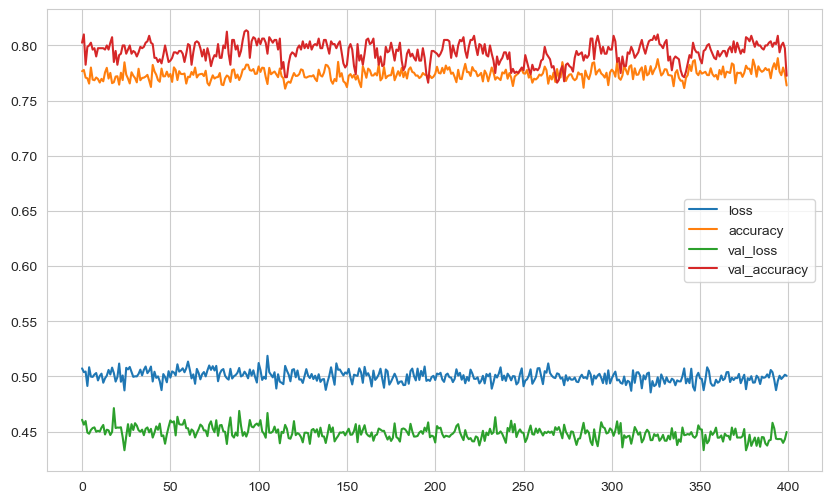

In [1920]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [1921]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 319us/step
[[   0 1607]
 [   0  393]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.16      2000
weighted avg       0.04      0.20      0.06      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [1922]:
#early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [1923]:
model_history = model.fit(X_train, y_train, validation_split = 0.33 , batch_size =10, epochs =1000,callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 554us/step - loss: 0.3945 - accuracy: 0.8436 - val_loss: 0.3490 - val_accuracy: 0.8557
Epoch 2/1000
536/536 [==============================] - 0s 498us/step - loss: 0.3942 - accuracy: 0.8459 - val_loss: 0.3510 - val_accuracy: 0.8554
Epoch 3/1000
536/536 [==============================] - 0s 506us/step - loss: 0.3798 - accuracy: 0.8543 - val_loss: 0.3503 - val_accuracy: 0.8576
Epoch 4/1000
536/536 [==============================] - 0s 520us/step - loss: 0.3863 - accuracy: 0.8451 - val_loss: 0.3538 - val_accuracy: 0.8508
Epoch 5/1000
536/536 [==============================] - 0s 501us/step - loss: 0.3680 - accuracy: 0.8503 - val_loss: 0.3526 - val_accuracy: 0.8535
Epoch 6/1000
536/536 [==============================] - 0s 523us/step - loss: 0.3710 - accuracy: 0.8505 - val_loss: 0.3539 - val_accuracy: 0.8535
Epoch 7/1000
536/536 [==============================] - 0s 514us/step - loss: 0.3765 - accuracy: 0.8459 - val_loss: 0.3524 -

#### Monitor the "val_recall" as metric

In [1924]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
import numpy as np

x = x.astype('float32')
y = y.astype('int')

class RecallCallback(Callback):
   def __init__(self, validation_data):
       super(RecallCallback, self).__init__()
       self.validation_data = validation_data

   def on_epoch_end(self, epoch, logs=None):
       y_val_pred = np.round(self.model.predict(self.validation_data[0]))
       recall = np.sum((self.validation_data[1] == 1) & (y_val_pred == 1)) / np.sum(self.validation_data[1] == 1)
       print(f'val_recall: {recall}')

# Assuming your model is a Sequential model
model = Sequential()
# ... define your model architecture ...

# Assuming your data is in X_train, y_train, x_val, y_val
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create an instance of the custom RecallCallback
recall_callback = RecallCallback(validation_data=(X_test, y))

# Train the model with the custom callback
model.fit(x, y, epochs=10, validation_data=(x, y), callbacks=[recall_callback])


Epoch 1/10
63/63 [==============================] - 0s 206us/steposs: 10.2748 - accuracy: 9.7656e-


ValueError: operands could not be broadcast together with shapes (10000,) (2000,10) 

## Optuna

In [1925]:
!pip install optuna

In [1926]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
tf.keras.optimizers.legacy.Adadelta

keras.src.optimizers.legacy.adadelta.Adadelta

In [1927]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [1928]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [1929]:
tf.keras.optimizers.legacy.Adadelta
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 23:39:24,221] A new study created in memory with name: no-name-60302c4d-b135-4f0b-8d23-31f2e61451f1


Restoring model weights from the end of the best epoch: 48.
Epoch 63: early stopping


[I 2023-10-30 23:39:29,081] Trial 0 finished with value: 0.659500002861023 and parameters: {'n_units1': 35, 'n_units2': 40, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.002755406753466799, 'w0': 0.01823576867827874, 'w1': 2.3165734760106496}. Best is trial 0 with value: 0.659500002861023.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:39:30,849] Trial 1 finished with value: 0.5450000166893005 and parameters: {'n_units1': 123, 'n_units2': 112, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 2.19017929395627e-05, 'w0': 2.9631118939347485, 'w1': 2.0286830089653023}. Best is trial 0 with value: 0.659500002861023.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:39:32,194] Trial 2 finished with value: 0.1965000033378601 and parameters: {'n_units1': 118, 'n_units2': 81, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.19364276941e-05, 'w0': 0.015638581812196357, 'w1': 2.9028163790900914}. Best is trial 0 with value: 0.659500002861023.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:39:33,301] Trial 3 finished with value: 0.1965000033378601 and parameters: {'n_units1': 10, 'n_units2': 128, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0017461137818975507, 'w0': 0.015271525897120298, 'w1': 0.23183127270074935}. Best is trial 0 with value: 0.659500002861023.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:39:34,520] Trial 4 finished with value: 0.8034999966621399 and parameters: {'n_units1': 61, 'n_units2': 97, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0019408488931394283, 'w0': 1.02988672058039, 'w1': 1.0274471633082918}. Best is trial 4 with value: 0.8034999966621399.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-10-30 23:39:35,907] Trial 5 finished with value: 0.8029999732971191 and parameters: {'n_units1': 22, 'n_units2': 105, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.028812682507441238, 'w0': 0.7547770642106827, 'w1': 0.15795619692552895}. Best is trial 4 with value: 0.8034999966621399.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:39:37,070] Trial 6 finished with value: 0.1965000033378601 and parameters: {'n_units1': 55, 'n_units2': 18, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.07163138707662564, 'w0': 0.12435649086990846, 'w1': 4.211579276566566}. Best is trial 4 with value: 0.8034999966621399.
[I 2023-10-30 23:39:43,309] Trial 7 finished with value: 0.5479999780654907 and parameters: {'n_units1': 74, 'n_units2': 85, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 3.498434166394172e-05, 'w0': 0.41033075673838104, 'w1': 0.9551375462984556}. Best is trial 4 with value: 0.8034999966621399.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:39:44,497] Trial 8 finished with value: 0.1965000033378601 and parameters: {'n_units1': 43, 'n_units2': 66, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.04555887581194823, 'w0': 0.051693567394715666, 'w1': 0.7474730317724939}. Best is trial 4 with value: 0.8034999966621399.
[I 2023-10-30 23:39:50,136] Trial 9 finished with value: 0.40450000762939453 and parameters: {'n_units1': 30, 'n_units2': 61, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00018027789761812036, 'w0': 1.848811691129597, 'w1': 0.03419961836858201}. Best is trial 4 with value: 0.8034999966621399.


{'n_units1': 61,
 'n_units2': 97,
 'optimizer': keras.src.optimizers.adadelta.Adadelta,
 'learning_rate': 0.0019408488931394283,
 'w0': 1.02988672058039,
 'w1': 1.0274471633082918}

In [1933]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
15/15 [==============================] - 0s 6ms/step - loss: 3.3289 - recall: 0.0612 - val_loss: 0.4445 - val_recall: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4464 - recall: 0.0000e+00 - val_loss: 0.4242 - val_recall: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4295 - recall: 0.0000e+00 - val_loss: 0.5044 - val_recall: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4938 - recall: 0.0074 - val_loss: 0.4280 - val_recall: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4340 - recall: 0.0000e+00 - val_loss: 0.5092 - val_recall: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4467 - recall: 0.0760 - val_loss: 0.4613 - val_recall: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4141 - recall: 0.2206 - val_loss: 0.4285 - val_recall: 0.3312
Epoch

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [1940]:
from optuna.visualization import plot_optimization_history, plot_param_importances


In [1941]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2023-10-30 23:46:07,147] A new study created in memory with name: no-name-e0d229d1-3ce3-4987-af47-94fecb066a65


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-10-30 23:46:08,854] Trial 0 finished with value: 0.765500009059906 and parameters: {'n_units1': 60, 'n_units2': 24, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.5561935999368113e-05, 'w0': 0.4756602759187481, 'w1': 0.17926031668153966}. Best is trial 0 with value: 0.765500009059906.


Restoring model weights from the end of the best epoch: 29.
Epoch 44: early stopping


[I 2023-10-30 23:46:11,436] Trial 1 finished with value: 0.44600000977516174 and parameters: {'n_units1': 17, 'n_units2': 45, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.002991364855515301, 'w0': 0.20782824528629096, 'w1': 0.965133986952402}. Best is trial 1 with value: 0.44600000977516174.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-10-30 23:46:13,608] Trial 2 finished with value: 0.1965000033378601 and parameters: {'n_units1': 45, 'n_units2': 118, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0005359152997130131, 'w0': 0.024891297185259436, 'w1': 1.3220478569010001}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 9.
Epoch 24: early stopping


[I 2023-10-30 23:46:15,099] Trial 3 finished with value: 0.8034999966621399 and parameters: {'n_units1': 118, 'n_units2': 11, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.04617092716855815, 'w0': 0.061676204205599286, 'w1': 0.014611043344867881}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:46:16,445] Trial 4 finished with value: 0.8034999966621399 and parameters: {'n_units1': 124, 'n_units2': 33, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.2323869060293687e-05, 'w0': 2.854302203477489, 'w1': 3.1054355097384025}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 23:46:17,921] Trial 5 finished with value: 0.6359999775886536 and parameters: {'n_units1': 25, 'n_units2': 50, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 6.682305830524969e-05, 'w0': 2.6307591791616947, 'w1': 0.3674752106534802}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 23.
Epoch 38: early stopping


[I 2023-10-30 23:46:20,577] Trial 6 finished with value: 0.8029999732971191 and parameters: {'n_units1': 111, 'n_units2': 108, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0015760364830476536, 'w0': 4.171070601544545, 'w1': 0.4457726252235699}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 56.
Epoch 71: early stopping


[I 2023-10-30 23:46:24,989] Trial 7 finished with value: 0.8034999966621399 and parameters: {'n_units1': 67, 'n_units2': 85, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0011602287367406118, 'w0': 1.09420460217233, 'w1': 0.010565108904643175}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-30 23:46:26,984] Trial 8 finished with value: 0.5734999775886536 and parameters: {'n_units1': 116, 'n_units2': 118, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.03339313681189483, 'w0': 0.9531106279150598, 'w1': 0.0326855508510231}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:46:28,193] Trial 9 finished with value: 0.8034999966621399 and parameters: {'n_units1': 117, 'n_units2': 48, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 8.945961063712391e-05, 'w0': 1.1724507750409938, 'w1': 2.6875582800595947}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:46:29,390] Trial 10 finished with value: 0.4794999957084656 and parameters: {'n_units1': 42, 'n_units2': 87, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0002593790647635368, 'w0': 0.010007376756308584, 'w1': 4.067798253445347}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 23:46:30,756] Trial 11 finished with value: 0.6025000214576721 and parameters: {'n_units1': 8, 'n_units2': 68, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0068718264875831225, 'w0': 0.1139049708631493, 'w1': 1.1759335980223045}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:46:31,959] Trial 12 finished with value: 0.1965000033378601 and parameters: {'n_units1': 44, 'n_units2': 125, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0041887108309129235, 'w0': 0.03136687864176534, 'w1': 1.0945905767691546}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:46:33,164] Trial 13 finished with value: 0.1965000033378601 and parameters: {'n_units1': 42, 'n_units2': 127, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.007730889456684461, 'w0': 0.02564102020591649, 'w1': 1.1945933656736845}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-10-30 23:46:34,939] Trial 14 finished with value: 0.6644999980926514 and parameters: {'n_units1': 91, 'n_units2': 97, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0004889368492658488, 'w0': 0.03920005158929141, 'w1': 0.19213920299107554}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2023-10-30 23:46:36,700] Trial 15 finished with value: 0.7275000214576721 and parameters: {'n_units1': 47, 'n_units2': 128, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00046627929251408327, 'w0': 0.010848359096377604, 'w1': 1.8622486180932005}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:46:38,290] Trial 16 finished with value: 0.1965000033378601 and parameters: {'n_units1': 81, 'n_units2': 105, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.013227364263320428, 'w0': 0.02504344898449797, 'w1': 0.6418489691031817}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 22.
Epoch 37: early stopping


[I 2023-10-30 23:46:40,983] Trial 17 finished with value: 0.5985000133514404 and parameters: {'n_units1': 55, 'n_units2': 75, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.002301781637468293, 'w0': 0.10965897016425445, 'w1': 4.547437867099391}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:46:42,179] Trial 18 finished with value: 0.1965000033378601 and parameters: {'n_units1': 29, 'n_units2': 113, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.08711049559662552, 'w0': 0.018827851146949154, 'w1': 1.9734018960269046}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2023-10-30 23:46:44,163] Trial 19 finished with value: 0.5659999847412109 and parameters: {'n_units1': 82, 'n_units2': 93, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.003656823884768286, 'w0': 0.05418992908491261, 'w1': 0.6960153443360118}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 63.
Epoch 78: early stopping


[I 2023-10-30 23:46:49,163] Trial 20 finished with value: 0.5745000243186951 and parameters: {'n_units1': 32, 'n_units2': 75, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0006656788313120414, 'w0': 0.09076350238919968, 'w1': 4.986111944244528}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 23:46:50,525] Trial 21 finished with value: 0.7664999961853027 and parameters: {'n_units1': 42, 'n_units2': 125, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.011579158760544744, 'w0': 0.025403534298903088, 'w1': 1.2972713068482937}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:46:51,805] Trial 22 finished with value: 0.1979999989271164 and parameters: {'n_units1': 52, 'n_units2': 118, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.011748722121809137, 'w0': 0.038864057012530394, 'w1': 1.6561858852237101}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-30 23:46:53,627] Trial 23 finished with value: 0.6190000176429749 and parameters: {'n_units1': 37, 'n_units2': 128, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00469257825903554, 'w0': 0.018789631885597152, 'w1': 0.9645071949443038}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2023-10-30 23:46:55,572] Trial 24 finished with value: 0.5504999756813049 and parameters: {'n_units1': 65, 'n_units2': 104, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0014468451075415386, 'w0': 0.03434279133149396, 'w1': 2.3804203864850546}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-10-30 23:46:56,826] Trial 25 finished with value: 0.5195000171661377 and parameters: {'n_units1': 23, 'n_units2': 117, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.006666066756278891, 'w0': 0.01628757172532503, 'w1': 0.32886006366812676}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2023-10-30 23:46:58,640] Trial 26 finished with value: 0.20149999856948853 and parameters: {'n_units1': 73, 'n_units2': 99, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.002378622600393877, 'w0': 0.05950472376221019, 'w1': 0.7111716693695262}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 31.
Epoch 46: early stopping


[I 2023-10-30 23:47:01,524] Trial 27 finished with value: 0.5180000066757202 and parameters: {'n_units1': 49, 'n_units2': 113, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.02226202761900185, 'w0': 0.0139523710477967, 'w1': 1.6581945690922393}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 23:47:02,855] Trial 28 finished with value: 0.44850000739097595 and parameters: {'n_units1': 15, 'n_units2': 122, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.005985799693758023, 'w0': 0.026365790626945815, 'w1': 2.9077309219138416}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:04,278] Trial 29 finished with value: 0.8034999966621399 and parameters: {'n_units1': 57, 'n_units2': 60, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0007246000832679678, 'w0': 0.19694268061016834, 'w1': 0.2988737279216355}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 23:47:05,946] Trial 30 finished with value: 0.20350000262260437 and parameters: {'n_units1': 36, 'n_units2': 109, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.09927051388567508, 'w0': 0.3239401295296171, 'w1': 0.13623530421741092}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 21.
Epoch 36: early stopping


[I 2023-10-30 23:47:08,800] Trial 31 finished with value: 0.20000000298023224 and parameters: {'n_units1': 90, 'n_units2': 103, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.015552783706916895, 'w0': 0.025895777110110013, 'w1': 0.5900142119194158}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 20.
Epoch 35: early stopping


[I 2023-10-30 23:47:11,635] Trial 32 finished with value: 0.23600000143051147 and parameters: {'n_units1': 75, 'n_units2': 122, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0032582193502798747, 'w0': 0.021405373317374535, 'w1': 0.8887499352047686}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 18.
Epoch 33: early stopping


[I 2023-10-30 23:47:14,312] Trial 33 finished with value: 0.4519999921321869 and parameters: {'n_units1': 104, 'n_units2': 109, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.010115608426647259, 'w0': 0.012832950691827239, 'w1': 1.2162642452696566}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:15,756] Trial 34 finished with value: 0.1965000033378601 and parameters: {'n_units1': 64, 'n_units2': 91, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.02720574811468304, 'w0': 0.03621064346944141, 'w1': 0.5734616598521911}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-10-30 23:47:16,984] Trial 35 finished with value: 0.4909999966621399 and parameters: {'n_units1': 83, 'n_units2': 11, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.050158872808610845, 'w0': 0.014502499583538327, 'w1': 0.9915668930543041}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:18,391] Trial 36 finished with value: 0.36399999260902405 and parameters: {'n_units1': 59, 'n_units2': 37, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.017674302991295892, 'w0': 0.04411105378366607, 'w1': 0.44165455240036955}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 14.
Epoch 29: early stopping


[I 2023-10-30 23:47:20,267] Trial 37 finished with value: 0.5674999952316284 and parameters: {'n_units1': 44, 'n_units2': 114, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0018186747176939099, 'w0': 0.07731257858500544, 'w1': 1.41190434971416}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 23:47:22,722] Trial 38 finished with value: 0.5074999928474426 and parameters: {'n_units1': 101, 'n_units2': 102, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.003351195184511675, 'w0': 0.028303777023466526, 'w1': 0.8212104493374598}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 38.
Epoch 53: early stopping


[I 2023-10-30 23:47:26,398] Trial 39 finished with value: 0.5839999914169312 and parameters: {'n_units1': 20, 'n_units2': 120, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.007852109434687542, 'w0': 0.05114696241193716, 'w1': 2.500314091822631}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:27,786] Trial 40 finished with value: 0.1965000033378601 and parameters: {'n_units1': 71, 'n_units2': 108, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.042858404060082976, 'w0': 0.019812429792056288, 'w1': 0.5240895360976076}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:29,047] Trial 41 finished with value: 0.1965000033378601 and parameters: {'n_units1': 31, 'n_units2': 113, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.1278119007946459, 'w0': 0.01951503418042349, 'w1': 2.170329078601259}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:30,331] Trial 42 finished with value: 0.1965000033378601 and parameters: {'n_units1': 30, 'n_units2': 125, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.06936467227498769, 'w0': 0.01602961420751078, 'w1': 1.8865984130965658}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:31,673] Trial 43 finished with value: 0.19699999690055847 and parameters: {'n_units1': 38, 'n_units2': 114, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.025875045195207266, 'w0': 0.029086010302696946, 'w1': 1.3341102157946785}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:32,914] Trial 44 finished with value: 0.1965000033378601 and parameters: {'n_units1': 26, 'n_units2': 84, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0046848572213243084, 'w0': 0.01225824482582531, 'w1': 3.4343358664116934}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:34,182] Trial 45 finished with value: 0.1965000033378601 and parameters: {'n_units1': 16, 'n_units2': 128, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.05974778442102006, 'w0': 0.04401478306605515, 'w1': 1.050241110296013}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-10-30 23:47:35,486] Trial 46 finished with value: 0.5195000171661377 and parameters: {'n_units1': 49, 'n_units2': 97, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.03661969076772602, 'w0': 0.07347864217288412, 'w1': 3.152548363512641}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-10-30 23:47:37,235] Trial 47 finished with value: 0.4514999985694885 and parameters: {'n_units1': 8, 'n_units2': 120, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.02192231181348777, 'w0': 0.022091262594658684, 'w1': 1.9916600536696412}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-10-30 23:47:39,562] Trial 48 finished with value: 0.1965000033378601 and parameters: {'n_units1': 81, 'n_units2': 107, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.008499081090491085, 'w0': 0.010022809257919447, 'w1': 1.5461066592175146}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:40,785] Trial 49 finished with value: 0.1965000033378601 and parameters: {'n_units1': 41, 'n_units2': 80, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.017324222250276664, 'w0': 0.016862964867536256, 'w1': 0.8128102796637051}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-10-30 23:47:43,110] Trial 50 finished with value: 0.19900000095367432 and parameters: {'n_units1': 53, 'n_units2': 91, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0012090352217806976, 'w0': 0.032818058851346185, 'w1': 3.517738017362562}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 20.
Epoch 35: early stopping


[I 2023-10-30 23:47:45,817] Trial 51 finished with value: 0.5569999814033508 and parameters: {'n_units1': 63, 'n_units2': 92, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.03202783202628128, 'w0': 0.03661939011971127, 'w1': 0.6470566402033985}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-30 23:47:48,022] Trial 52 finished with value: 0.1965000033378601 and parameters: {'n_units1': 62, 'n_units2': 116, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.07013533103840446, 'w0': 0.0326430560062723, 'w1': 1.1227667213504737}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:49,479] Trial 53 finished with value: 0.1965000033378601 and parameters: {'n_units1': 45, 'n_units2': 123, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.013983398928040174, 'w0': 0.02366085098979633, 'w1': 0.7355076526043377}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:50,975] Trial 54 finished with value: 0.1965000033378601 and parameters: {'n_units1': 68, 'n_units2': 111, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.026357148906892156, 'w0': 0.04458405693497843, 'w1': 0.5098119238070344}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:52,378] Trial 55 finished with value: 0.1965000033378601 and parameters: {'n_units1': 78, 'n_units2': 104, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.011537505220573788, 'w0': 0.054291131934485044, 'w1': 1.2564936119964023}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 34.
Epoch 49: early stopping


[I 2023-10-30 23:47:55,766] Trial 56 finished with value: 0.8034999966621399 and parameters: {'n_units1': 35, 'n_units2': 62, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.005599533676973173, 'w0': 0.017569282367545, 'w1': 1.655141524256044}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:47:57,181] Trial 57 finished with value: 0.1965000033378601 and parameters: {'n_units1': 89, 'n_units2': 99, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.038392503378187885, 'w0': 0.034165065247118896, 'w1': 2.3654498611661854}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2023-10-30 23:47:59,019] Trial 58 finished with value: 0.2004999965429306 and parameters: {'n_units1': 27, 'n_units2': 117, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.004633478123301613, 'w0': 0.023600806140017777, 'w1': 0.906844917041323}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2023-10-30 23:48:00,709] Trial 59 finished with value: 0.590499997138977 and parameters: {'n_units1': 50, 'n_units2': 128, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.007976784224533651, 'w0': 0.012277935914215412, 'w1': 1.4742465600736758}. Best is trial 2 with value: 0.1965000033378601.
[I 2023-10-30 23:48:07,028] Trial 60 finished with value: 0.8029999732971191 and parameters: {'n_units1': 56, 'n_units2': 89, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0002112439163830102, 'w0': 0.06404856598114776, 'w1': 0.6307498182993185}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:08,363] Trial 61 finished with value: 0.1965000033378601 and parameters: {'n_units1': 67, 'n_units2': 106, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.04610825081181133, 'w0': 0.019487509868667745, 'w1': 0.47026479109462227}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:09,684] Trial 62 finished with value: 0.1965000033378601 and parameters: {'n_units1': 72, 'n_units2': 110, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.08290368836826487, 'w0': 0.021469752402585748, 'w1': 0.36719970968369364}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:11,025] Trial 63 finished with value: 0.1965000033378601 and parameters: {'n_units1': 72, 'n_units2': 118, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.051549561324812296, 'w0': 0.02921063050110093, 'w1': 0.5632770773225221}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:12,307] Trial 64 finished with value: 0.1965000033378601 and parameters: {'n_units1': 41, 'n_units2': 123, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.01818515618044737, 'w0': 0.014859598388713313, 'w1': 0.9721104911124653}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:13,814] Trial 65 finished with value: 0.1965000033378601 and parameters: {'n_units1': 85, 'n_units2': 96, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.030579188881553074, 'w0': 0.01830085427283025, 'w1': 0.8077245870733263}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 6.
Epoch 21: early stopping


[I 2023-10-30 23:48:15,358] Trial 66 finished with value: 0.5509999990463257 and parameters: {'n_units1': 59, 'n_units2': 18, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.038954811263431206, 'w0': 0.03925489392084358, 'w1': 0.4114536763480571}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 18.
Epoch 33: early stopping


[I 2023-10-30 23:48:18,137] Trial 67 finished with value: 0.38499999046325684 and parameters: {'n_units1': 101, 'n_units2': 101, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.012549656123450537, 'w0': 0.027367256654430773, 'w1': 0.5340726039128966}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:19,376] Trial 68 finished with value: 0.1965000033378601 and parameters: {'n_units1': 22, 'n_units2': 107, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.10099297854755215, 'w0': 0.012175238706359694, 'w1': 0.2756705261635104}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 18.
Epoch 33: early stopping


[I 2023-10-30 23:48:22,184] Trial 69 finished with value: 0.6255000233650208 and parameters: {'n_units1': 96, 'n_units2': 125, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.002393877337359336, 'w0': 0.022285221687066408, 'w1': 1.1181601975816895}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:23,524] Trial 70 finished with value: 0.4855000078678131 and parameters: {'n_units1': 54, 'n_units2': 115, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.022272818494009507, 'w0': 0.01510770432241929, 'w1': 0.7370271103814886}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:24,819] Trial 71 finished with value: 0.1965000033378601 and parameters: {'n_units1': 31, 'n_units2': 113, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.10989309302501617, 'w0': 0.019092498266701084, 'w1': 1.9138220501395882}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:26,523] Trial 72 finished with value: 0.1965000033378601 and parameters: {'n_units1': 127, 'n_units2': 111, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.07463420833319886, 'w0': 0.025385380731149258, 'w1': 2.1996586703917838}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:27,947] Trial 73 finished with value: 0.1965000033378601 and parameters: {'n_units1': 33, 'n_units2': 120, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.09400210702594787, 'w0': 0.030856753349537126, 'w1': 2.7219068705842466}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:29,277] Trial 74 finished with value: 0.1979999989271164 and parameters: {'n_units1': 28, 'n_units2': 119, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.05743681310530812, 'w0': 0.01897217795489529, 'w1': 1.3864481479974855}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 23:48:31,555] Trial 75 finished with value: 0.1965000033378601 and parameters: {'n_units1': 46, 'n_units2': 105, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.12988773043214513, 'w0': 0.013734006548086146, 'w1': 1.7386692634003664}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-10-30 23:48:33,455] Trial 76 finished with value: 0.1965000033378601 and parameters: {'n_units1': 40, 'n_units2': 112, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.12329136456002011, 'w0': 0.04034135158025429, 'w1': 2.122798597902603}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:34,605] Trial 77 finished with value: 0.6184999942779541 and parameters: {'n_units1': 13, 'n_units2': 125, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.009264487882102119, 'w0': 0.04712259607434639, 'w1': 1.180770822687786}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-10-30 23:48:36,440] Trial 78 finished with value: 0.46050000190734863 and parameters: {'n_units1': 76, 'n_units2': 94, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.04428530856291526, 'w0': 0.010865827062278097, 'w1': 1.0106846007021886}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:37,614] Trial 79 finished with value: 0.1965000033378601 and parameters: {'n_units1': 37, 'n_units2': 100, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.05542841541119044, 'w0': 0.03423234751847367, 'w1': 3.9969585226278768}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:38,816] Trial 80 finished with value: 0.1965000033378601 and parameters: {'n_units1': 69, 'n_units2': 84, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.07985431793604018, 'w0': 0.016098528059442768, 'w1': 0.6414971890689696}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:39,995] Trial 81 finished with value: 0.1965000033378601 and parameters: {'n_units1': 30, 'n_units2': 125, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.06551527351940527, 'w0': 0.026212168298646525, 'w1': 1.5941654216402237}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:41,183] Trial 82 finished with value: 0.1965000033378601 and parameters: {'n_units1': 34, 'n_units2': 122, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.08427473446550718, 'w0': 0.021511101958503608, 'w1': 1.9215093863725652}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:42,334] Trial 83 finished with value: 0.1965000033378601 and parameters: {'n_units1': 24, 'n_units2': 116, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.035247487795584447, 'w0': 0.015660833443023884, 'w1': 2.882463087645141}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 22.
Epoch 37: early stopping


[I 2023-10-30 23:48:45,056] Trial 84 finished with value: 0.1965000033378601 and parameters: {'n_units1': 18, 'n_units2': 125, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.06520399826998338, 'w0': 0.030326153028781992, 'w1': 1.3234189982116842}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:46,273] Trial 85 finished with value: 0.6804999709129333 and parameters: {'n_units1': 29, 'n_units2': 108, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.02773960014420729, 'w0': 0.019655145672039208, 'w1': 2.3703492257305148}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-10-30 23:48:50,430] Trial 86 finished with value: 0.5705000162124634 and parameters: {'n_units1': 51, 'n_units2': 114, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.016318382294929188, 'w0': 0.024511192223159922, 'w1': 0.8771293027561199}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-10-30 23:48:52,595] Trial 87 finished with value: 0.1965000033378601 and parameters: {'n_units1': 43, 'n_units2': 127, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.11122797235559166, 'w0': 0.016784603467699524, 'w1': 1.7576666627831259}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-30 23:48:54,352] Trial 88 finished with value: 0.1965000033378601 and parameters: {'n_units1': 47, 'n_units2': 71, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0105901265470418, 'w0': 0.013786866720906324, 'w1': 1.1097534363631971}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:55,568] Trial 89 finished with value: 0.1965000033378601 and parameters: {'n_units1': 38, 'n_units2': 121, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.043580157624813654, 'w0': 0.03781074619096503, 'w1': 1.4574147612549062}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:57,062] Trial 90 finished with value: 0.1965000033378601 and parameters: {'n_units1': 87, 'n_units2': 117, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.05042781295954684, 'w0': 0.028085265401350794, 'w1': 2.1077380341586376}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-10-30 23:48:58,385] Trial 91 finished with value: 0.6679999828338623 and parameters: {'n_units1': 25, 'n_units2': 81, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.004780267645412561, 'w0': 0.010678167880104165, 'w1': 3.5618106212351592}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:48:59,528] Trial 92 finished with value: 0.1965000033378601 and parameters: {'n_units1': 12, 'n_units2': 76, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0070846554927180535, 'w0': 0.01203603123943233, 'w1': 2.5841968340403225}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:49:00,715] Trial 93 finished with value: 0.1965000033378601 and parameters: {'n_units1': 21, 'n_units2': 111, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.006555951522902184, 'w0': 0.020974740484851033, 'w1': 3.3021369504412994}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:49:01,893] Trial 94 finished with value: 0.1965000033378601 and parameters: {'n_units1': 27, 'n_units2': 87, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.014422691921956464, 'w0': 0.0166013866189025, 'w1': 4.661430664693796}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 14.
Epoch 29: early stopping


[I 2023-10-30 23:49:03,686] Trial 95 finished with value: 0.7204999923706055 and parameters: {'n_units1': 19, 'n_units2': 103, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0038632139694079618, 'w0': 0.024264174141019078, 'w1': 1.247978564914593}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:49:04,826] Trial 96 finished with value: 0.6255000233650208 and parameters: {'n_units1': 32, 'n_units2': 54, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.020991456919413988, 'w0': 0.01432981732007225, 'w1': 2.9664623986186234}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:49:06,222] Trial 97 finished with value: 0.1965000033378601 and parameters: {'n_units1': 63, 'n_units2': 95, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.009149539228038624, 'w0': 0.01833873099841855, 'w1': 0.7554807892344433}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:49:07,574] Trial 98 finished with value: 0.1965000033378601 and parameters: {'n_units1': 79, 'n_units2': 119, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.09041924917920599, 'w0': 0.013293099970304822, 'w1': 0.9227142728998681}. Best is trial 2 with value: 0.1965000033378601.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 23:49:08,736] Trial 99 finished with value: 0.1965000033378601 and parameters: {'n_units1': 25, 'n_units2': 98, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00268072957637291, 'w0': 0.022679050906435405, 'w1': 1.8468600833209017}. Best is trial 2 with value: 0.1965000033378601.


In [1942]:
plot_optimization_history(study)

In [1943]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 283us/step
[[   0 1607]
 [   0  393]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.16      2000
weighted avg       0.04      0.20      0.06      2000



63/63 [==============================] - 0s 325us/step


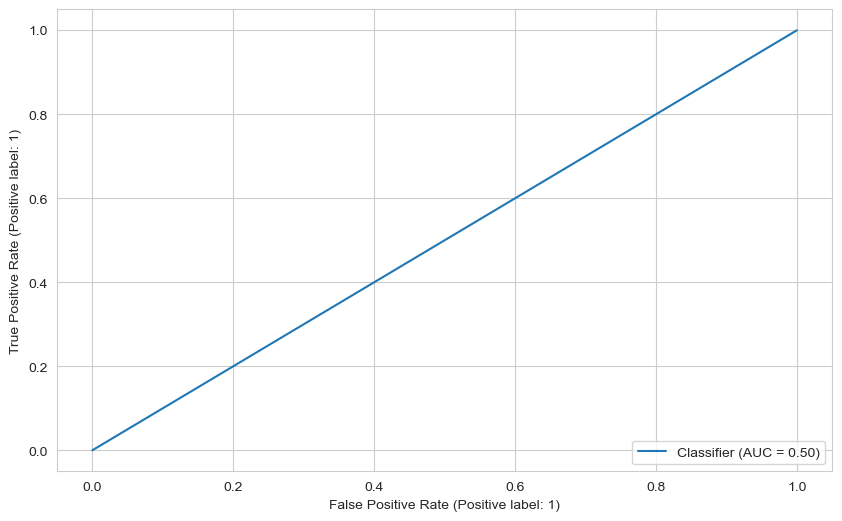

In [1944]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [1945]:
roc_auc_score(y_test, y_pred_proba)

0.5

In [1946]:
#history = model.history.history

# Final Model and Model Deployment

In [1947]:
from sklearn.preprocessing import StandardScaler
import pickle
import joblib

In [1948]:
pickle.dump(sc, open("scaler_churn", 'wb'))

In [1949]:
tf.keras.optimizers.legacy.Adadelta
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6978 - recall: 0.6752 - val_loss: 0.6069 - val_recall: 0.1847
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5687 - recall: 0.0316 - val_loss: 0.5186 - val_recall: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5125 - recall: 0.0000e+00 - val_loss: 0.4853 - val_recall: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4916 - recall: 0.0000e+00 - val_loss: 0.4664 - val_recall: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4754 - recall: 0.0000e+00 - val_loss: 0.4501 - val_recall: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4614 - recall: 0.0054 - val_loss: 0.4362 - val_recall: 0.0318
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4498 - recall: 0.0397 - val_loss: 0.4250 - val_recall: 0.1083
Epoch 8/100
1

15/15 [==============================] - 0s 1ms/step - loss: 0.3346 - recall: 0.4781 - val_loss: 0.3362 - val_recall: 0.3885
Epoch 61/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3329 - recall: 0.4553 - val_loss: 0.3371 - val_recall: 0.3885
Epoch 62/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3323 - recall: 0.4566 - val_loss: 0.3369 - val_recall: 0.3885
Epoch 63/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3319 - recall: 0.4499 - val_loss: 0.3368 - val_recall: 0.3949
Epoch 64/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3317 - recall: 0.4633 - val_loss: 0.3364 - val_recall: 0.4013
Epoch 65/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3310 - recall: 0.4492 - val_loss: 0.3368 - val_recall: 0.3822
Epoch 66/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3306 - recall: 0.4580 - val_loss: 0.3364 - val_recall: 0.3885
Epoch 67/100
15/15 [===========================

<Axes: >

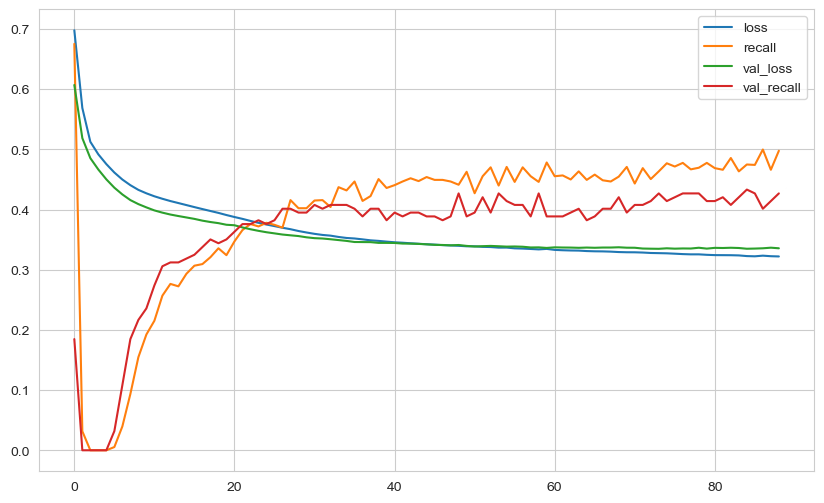

In [1950]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [1951]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  7245.51708984375
accuracy:  0.20865139365196228


In [1952]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 311us/step
[[1086  521]
 [ 311   82]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1607
           1       0.14      0.21      0.16       393

    accuracy                           0.58      2000
   macro avg       0.46      0.44      0.44      2000
weighted avg       0.65      0.58      0.61      2000



In [1953]:
model.save("model_churn.h5")

In [1954]:
from tensorflow.keras.models import load_model

In [1955]:
model_churn = load_model("model_churn.h5")
scaler_churn = pickle.load(open("scaler_churn", "rb"))

## Prediction

In [1956]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore          619.000
Geography              0.000
Gender                 0.000
Age                   42.000
Tenure                 2.000
Balance                0.000
NumOfProducts          1.000
HasCrCard              1.000
IsActiveMember         1.000
EstimatedSalary   101348.880
Name: 0, dtype: float64

In [1957]:
single_customer = sc.transform(single_customer.values.reshape(-1, 10))
single_customer

array([[-0.33880827, -0.9055496 , -1.09499335,  0.29493847, -1.04241787,
        -1.21847056, -0.91668767,  0.64920267,  0.97481699,  0.01595384]])

In [1958]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 20ms/step


array([[0]], dtype=int32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___